In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
customers_df = pd.read_csv('/content/olist_customers_dataset.csv')

print("shape of customers dataset (rows,colums):", customers_df.shape)

print("\nColumn dtypes:")
print(customers_df.dtypes)

print("\nFirst 5 rows of customers dataset:")
print(customers_df.head())


print("\n missing values in each column:")
print(customers_df.isnull().sum())

print("\n number of unique values in each column:")
print(customers_df.nunique())

print("\n unique customer_id count:", customers_df['customer_id'].nunique())
print("unique customer_unique_id count:", customers_df['customer_unique_id'].nunique())


#customers with multiple accounts
dup_unique = customers_df["customer_unique_id"].value_counts()
print("\nCustomer_unique_id with more than one row", (dup_unique>1).sum())

city_counts = (customers_df.groupby("customer_city")["customer_unique_id"]
                .nunique()
                .sort_values(ascending=False)
                .head(10))
print("\nTop10 cities by number of unique customers:")
print(city_counts)

state_counts = (customers_df.groupby("customer_state")["customer_unique_id"]
                .nunique()
                .sort_values(ascending=False)
                .head(10))
print("\nTop10 states by number of unique customers:")
print(state_counts)

shape of customers dataset (rows,colums): (99441, 5)

Column dtypes:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

First 5 rows of customers dataset:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             

In customers_datasetstate,city,zipcode all are redundant so we can use some feature that can get all this information into one.

In [3]:
orders_df = pd.read_csv('/content/olist_orders_dataset.csv')

print("shape of orders dataset (rows,colums):", orders_df.shape)

print("\nColumn dtypes:")
print(orders_df.dtypes)


print("\first 5 rows of orders dataset:")
print(orders_df.head())

print("\n missing values in each column:")
print(orders_df.isnull().sum())

print("\n number of unique values in each column:")
print(orders_df.nunique())

print("\norder status percentage:")
print(orders_df['order_status'].value_counts(normalize=True))

print("\norder status count:")
print(orders_df['order_status'].value_counts())

#conversion of date time columns to proper datetime for future EDA
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

orders_df[date_cols]= orders_df[date_cols].apply(pd.to_datetime, errors = 'coerce')

print("\ndtypes after datetime conversions")
print(orders_df.dtypes)


print("\n orders purchase date range:")
print(orders_df['order_purchase_timestamp'].agg(['min','max']))

is_delivered = orders_df['order_status']=='delivered'
print("\nDelivered orders:", is_delivered.sum())
print("\nNon-delivered order:", (~is_delivered).sum())




shape of orders dataset (rows,colums): (99441, 8)

Column dtypes:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
irst 5 rows of orders dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1

In [4]:
order_items_df = pd.read_csv("/content/olist_order_items_dataset.csv")

print("shape of order_items dataset (rows,colums):", order_items_df.shape)
print("\ndtypes:",)
print(order_items_df.dtypes)

print("\nfirst 5 rows")
print(order_items_df.head())

print("\n missing values per column:")
print(order_items_df.isnull().sum())

print("\n number of unique values per column:")
print(order_items_df.nunique())

print("\n numeric_summary:")
print(order_items_df[["price", "freight_value"]].describe())

order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"],errors="coerce")

print("\ndtyoes after dtype conversion:")
print(order_items_df.dtypes)

items_per_order = order_items_df.groupby("order_id")["order_item_id"].count()
print("\nitems per order(describe):")
print(items_per_order.describe())

print("\nDistinct Products:", order_items_df["product_id"].nunique())
print("\nDistinct Sellers:", order_items_df["seller_id"].nunique())

shape of order_items dataset (rows,colums): (112650, 7)

dtypes:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

first 5 rows
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   


In [5]:
order_payments_df = pd.read_csv("/content/olist_order_payments_dataset.csv")

print("shape of order_payments dataset (rows,colums):", order_payments_df.shape)

print("\ndtypes:")
print(order_payments_df.dtypes)

print("\nfirst 5 rows")
print(order_payments_df.head())

print("\n missing values per column:")
print(order_payments_df.isnull().sum())

print("\nNumber of unique values per column:")
print(order_payments_df.nunique())

print("\nPayment type counts")
print(order_payments_df["payment_type"].value_counts())

print("\nPayment type Percentages:")
print(order_payments_df["payment_type"].value_counts(normalize=True)*100)

print("\n numeric_summary:")
print(order_payments_df[["payment_installments","payment_value"]].describe())

payments_per_order = order_payments_df.groupby("order_id")["payment_sequential"].count()

print("\npayments per order(describe):")
print(payments_per_order.describe())

print("\npayments per order(value_counts):")
print((payments_per_order > 1).sum())




shape of order_payments dataset (rows,colums): (103886, 5)

dtypes:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

first 5 rows
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  

 missing values per column:
order_id                0
payment_se

In [6]:
order_reviews_df = pd.read_csv("/content/olist_order_reviews_dataset.csv")


print("order_reviews df (rows.columns):" , order_reviews_df.shape)
print("\ndtypes:")
print(order_reviews_df.dtypes)

print("\nfirst 5 rows")
print(order_reviews_df.head())

print("\n missing values per column:")
print(order_reviews_df.isnull().sum())

print("\nNumber of unique values per column:")
print(order_reviews_df.nunique())

print("\nReview score counts")
print(order_reviews_df["review_score"].value_counts().sort_index())

print("\nReview score Percentages:")
print(order_reviews_df["review_score"].value_counts(normalize=True).sort_index()*100)

date_cols = ["review_creation_date","review_answer_timestamp"]
order_reviews_df[date_cols] = order_reviews_df[date_cols].apply(pd.to_datetime, errors="coerce")

print("\ndtypes after dtype conversion:")
print(order_reviews_df.dtypes)


print("\nReview creation date range:")
print(order_reviews_df["review_creation_date"].agg(["min","max"]))





order_reviews df (rows.columns): (99224, 7)

dtypes:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

first 5 rows
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

 

In [7]:
products_df = pd.read_csv("/content/olist_products_dataset.csv")

print("shape of products(rows,columns):", products_df.shape)

print("\ndtpys:")
print(products_df.dtypes)

print("\n first 5 rows of products dataset:")
print(products_df.head())


print("\nmissing values per column:")
print(products_df.isnull().sum())

print("\nnumber of unique values per column:")
print(products_df.nunique())

num_cols=["product_name_lenght", "product_description_lenght",
          "product_photos_qty","product_weight_g",
          "product_length_cm",
          "product_height_cm", "product_width_cm"]

print("\nnumeric summary:")
print(products_df[num_cols].describe())

print("\nTop10product categories by count:")

print(products_df["product_category_name"].value_counts().head(10))

missing_cat = products_df["product_category_name"].isnull().sum()
print("\nNumber of missing product categories:", missing_cat)




shape of products(rows,columns): (32951, 9)

dtpys:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

 first 5 rows of products dataset:
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0             

product dimension and weight in some cases can be equivalent to more value.

In [8]:
translation_df = pd.read_csv("/content/product_category_name_translation.csv")

print("shape of tanslation df (rows,columns):", translation_df.shape)

print("\ndtypes:")
print(translation_df.dtypes)

print("\nfirst 5 rows of translation df:")
print(translation_df.head())


print("\nCheck uniqueness:")
print("Unique product_category_name:", translation_df["product_category_name"].nunique())
print("Unique product_category_name_english:", translation_df["product_category_name_english"].nunique())

shape of tanslation df (rows,columns): (71, 2)

dtypes:
product_category_name            object
product_category_name_english    object
dtype: object

first 5 rows of translation df:
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

Check uniqueness:
Unique product_category_name: 71
Unique product_category_name_english: 71


In [9]:
geolocation_df = pd.read_csv("/content/olist_geolocation_dataset.csv")

print("shape of geolocation df (rows,columns):", geolocation_df.shape)

print("\ndtypes:")
print(geolocation_df.dtypes)

print("\n first 5 rows of geolocation df:")
print(geolocation_df.head())

print("\nMissing values per column:")
print(geolocation_df.isnull().sum())

print("\nNumber of unique values per column:")
print(geolocation_df.nunique())

print("\nNumber of zip prefixes per state:")
print(geolocation_df.groupby("geolocation_state")["geolocation_zip_code_prefix"].nunique().sort_values(ascending=False))


geo_agg_df = (
    geolocation_df
    .groupby("geolocation_zip_code_prefix")[["geolocation_lat", "geolocation_lng"]]
    .mean()
    .reset_index()
)

print("\nAggregated geolocation shape (zip → mean lat/lng):", geo_agg_df.shape)
print(geo_agg_df.head())


shape of geolocation df (rows,columns): (1000163, 5)

dtypes:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

 first 5 rows of geolocation df:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  

Missing values per column:
geolocation_zip_code_pre

In [10]:
sellers_df = pd.read_csv("/content/sellers.csv")

print("Shape of the sellers dataframe(rows,col):", sellers_df.shape)

print("\ndtypes:")
print(sellers_df.dtypes)

print("\nfirst 5 rows of sellers df:")
print(sellers_df.head())

print("/nmissing values per column:")
print(sellers_df.isnull().sum())

print("\nnumber of unique values per column:")
print(sellers_df.nunique())

print("\nNumber of sellers per state:")
print(
    sellers_df.groupby("seller_state")["seller_id"]
    .nunique()
    .sort_values(ascending=False)
)

print("\n Top 10 seller cities by count:")
print(sellers_df["seller_city"]
      .value_counts()
      .head())


Shape of the sellers dataframe(rows,col): (3095, 4)

dtypes:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

first 5 rows of sellers df:
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  
/nmissing values per column:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

number of uniq

In [11]:
#joining the customers and geo loaction

customers_geo_df = customers_df.merge(
    geo_agg_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)

customers_geo_df = customers_geo_df.drop(columns=["geolocation_zip_code_prefix"])

customers_geo_df.head()



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


In [12]:
orders_df["purchase_hour"] = orders_df["order_purchase_timestamp"].dt.hour
orders_df["is_impulse"] = ((orders_df["purchase_hour"] >= 22) | (orders_df["purchase_hour"] <= 5)).astype(int)
orders_df["is_delivered"] = (orders_df["order_status"] == "delivered").astype(int)
orders_cust_df = orders_df.merge(
    customers_df[["customer_id","customer_unique_id"]],
    how="left",
    on="customer_id"
)
max_purchase_date = orders_cust_df["order_purchase_timestamp"].max()
print("orders_cust shape:", orders_cust_df.shape)
print("max_purchase_date:", max_purchase_date)
print(orders_cust_df.head())

orders_cust shape: (99441, 12)
max_purchase_date: 2018-10-17 17:30:18
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10

In [13]:
orders_cust_agg = (
    orders_cust_df
    .groupby("customer_unique_id")
    .agg(
        n_orders= ("order_id","nunique"),
        n_delivered= ("is_delivered","sum"),
        n_is_impulse= ("is_impulse","sum"),
        first_order_date= ("order_purchase_timestamp","min"),
        last_order_date= ("order_purchase_timestamp","max"),

    )
    .reset_index()
)

#computing recency and ratios

max_purchase_date = orders_cust_df["order_purchase_timestamp"].max()

#days since last order from each customer
orders_cust_agg["customer_recency"]= (max_purchase_date - orders_cust_agg["last_order_date"]).dt.days

#fraction of orders that were impulse
orders_cust_agg["is_impulse_ratio"] = (orders_cust_agg["n_delivered"]/ orders_cust_agg["n_orders"])

#customer lifetime
orders_cust_agg["customer_lifetime_days"] = (
    orders_cust_agg["last_order_date"] - orders_cust_agg["first_order_date"]
).dt.days

print(orders_cust_agg.head())
print("\nColumns in orders_cust_agg:", orders_cust_agg.columns.tolist())

                 customer_unique_id  n_orders  n_delivered  n_is_impulse  \
0  0000366f3b9a7992bf8c76cfdf3221e2         1            1             0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         1            1             0   
2  0000f46a3911fa3c0805444483337064         1            1             0   
3  0000f6ccb0745a6a4b88665a16c9f078         1            1             0   
4  0004aac84e0df4da2b147fca70cf8255         1            1             0   

     first_order_date     last_order_date  customer_recency  is_impulse_ratio  \
0 2018-05-10 10:56:27 2018-05-10 10:56:27               160               1.0   
1 2018-05-07 11:11:27 2018-05-07 11:11:27               163               1.0   
2 2017-03-10 21:05:03 2017-03-10 21:05:03               585               1.0   
3 2017-10-12 20:29:41 2017-10-12 20:29:41               369               1.0   
4 2017-11-14 19:45:42 2017-11-14 19:45:42               336               1.0   

   customer_lifetime_days  
0                       0  


In [14]:
order_items_agg = (
    order_items_df
    .groupby("order_id")
    .agg(
        n_items= ("order_item_id","count"),
        n_products = ("product_id","nunique"),
        n_sellers= ("seller_id","nunique"),
        order_items_total_price=("price","sum"),
        order_items_total_freight= ("freight_value","sum")
    )
    .reset_index()
)

print("order_items_agg shape:", order_items_agg.shape)
print(order_items_agg.head())

order_items_cust = order_items_agg.merge(
    orders_cust_df[["order_id", "customer_unique_id"]],
    on="order_id",
    how="left"
)

print("\norder_items_cust shape:", order_items_cust.shape)
print(order_items_cust.head())

order_items_cust_agg = (
    order_items_cust
    .groupby("customer_unique_id")
    .agg(
        total_revenue=("order_items_total_price", "sum"),      # total spent on products
        total_freight=("order_items_total_freight", "sum"),    # total freight paid
        avg_order_value=("order_items_total_price", "mean"),   # avg order value
        avg_items_per_order=("n_items", "mean"),               # avg basket size
        avg_products_per_order=("n_products", "mean"),         # avg distinct products per order
        n_distinct_sellers=("n_sellers", "nunique"),           # how many sellers they ever bought from
    )
    .reset_index()
)


print("\norder_items_cust_agg shape:", order_items_cust_agg.shape)
print(order_items_cust_agg.head())
print("\nColumns in order_items_cust_agg:", order_items_cust_agg.columns.tolist())


order_items_agg shape: (98666, 6)
                           order_id  n_items  n_products  n_sellers  \
0  00010242fe8c5a6d1ba2dd792cb16214        1           1          1   
1  00018f77f2f0320c557190d7a144bdd3        1           1          1   
2  000229ec398224ef6ca0657da4fc703e        1           1          1   
3  00024acbcdf0a6daa1e931b038114c75        1           1          1   
4  00042b26cf59d7ce69dfabb4e55b4fd9        1           1          1   

   order_items_total_price  order_items_total_freight  
0                    58.90                      13.29  
1                   239.90                      19.93  
2                   199.00                      17.87  
3                    12.99                      12.79  
4                   199.90                      18.14  

order_items_cust shape: (98666, 7)
                           order_id  n_items  n_products  n_sellers  \
0  00010242fe8c5a6d1ba2dd792cb16214        1           1          1   
1  00018f77f2f0320c557190

In [15]:
payments_agg = (
    order_payments_df
    .groupby("order_id")
    .agg(
        payment_total=("payment_value", "sum"),
        n_payments=("payment_sequential", "count"),
        max_installments=("payment_installments", "max"),
    )
    .reset_index()
)



print("payments_agg shape:", payments_agg.shape)
print(payments_agg.head())

payments_cust = payments_agg.merge(
    orders_cust_df[["order_id", "customer_unique_id"]],
    on="order_id",
    how="left"
)

print("\npayments_cust shape:", payments_cust.shape)
print(payments_cust.head())


payments_cust_agg = (
    payments_cust
    .groupby("customer_unique_id")
    .agg(
        total_payment_value=("payment_total", "sum"),      # total amount paid
        avg_payment_installments=("max_installments", "mean"), # avg installments per order
        avg_payments_per_order=("n_payments", "mean"),     # avg number of payment records per order
    )
    .reset_index()
)

print("\npayments_cust_agg shape:", payments_cust_agg.shape)
print(payments_cust_agg.head())
print("\nColumns in payments_cust_agg:", payments_cust_agg.columns.tolist())


payments_agg shape: (99440, 4)
                           order_id  payment_total  n_payments  \
0  00010242fe8c5a6d1ba2dd792cb16214          72.19           1   
1  00018f77f2f0320c557190d7a144bdd3         259.83           1   
2  000229ec398224ef6ca0657da4fc703e         216.87           1   
3  00024acbcdf0a6daa1e931b038114c75          25.78           1   
4  00042b26cf59d7ce69dfabb4e55b4fd9         218.04           1   

   max_installments  
0                 2  
1                 3  
2                 5  
3                 2  
4                 3  

payments_cust shape: (99440, 5)
                           order_id  payment_total  n_payments  \
0  00010242fe8c5a6d1ba2dd792cb16214          72.19           1   
1  00018f77f2f0320c557190d7a144bdd3         259.83           1   
2  000229ec398224ef6ca0657da4fc703e         216.87           1   
3  00024acbcdf0a6daa1e931b038114c75          25.78           1   
4  00042b26cf59d7ce69dfabb4e55b4fd9         218.04           1   

   max_ins

In [16]:
reviews_cust = order_reviews_df.merge(
    orders_cust_df[["order_id", "customer_unique_id"]],
    on="order_id",
    how="left"
)

print("\nreviews_cust shape:", reviews_cust.shape)
print(reviews_cust.head())

reviews_cust_agg = (
    reviews_cust
    .groupby("customer_unique_id")
    .agg(
        n_reviews=("review_id", "nunique"),                 # how many reviews
        avg_review_score=("review_score", "mean"),          # average score (1–5)
        n_low_reviews=("review_score", lambda x: (x <= 3).sum()),  # 3 or below = bad/neutral
        last_review_date=("review_creation_date", "max"),   # last time they left a review
    )
    .reset_index()
)

print("\nreviews_cust_agg shape:", reviews_cust_agg.shape)
print(reviews_cust_agg.head())
print("\nColumns in reviews_cust_agg:", reviews_cust_agg.columns.tolist())


reviews_cust shape: (99224, 8)
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN     

In [17]:
products_trans = products_df.merge(
  translation_df,
  on="product_category_name",
  how="left"
)

print("products_trans shape:", products_trans.shape)
print(products_trans.head())


order_items_prod = order_items_df.merge(
    products_trans[["product_id", "product_category_name_english"]],
    on="product_id",
    how="left"
)

print("\norder_items_prod shape:", order_items_prod.shape)
print(order_items_prod.head())


order_items_prod_cust = order_items_prod.merge(
    orders_cust_df[["order_id", "customer_unique_id"]],
    on="order_id",
    how="left"
)

print("\norder_items_prod_cust shape:", order_items_prod_cust.shape)
print(order_items_prod_cust.head())


cat_agg = (
    order_items_prod_cust
    .groupby("customer_unique_id")["product_category_name_english"]
    .agg(
        n_distinct_categories=lambda x: x.nunique(),
        top_category=lambda x: x.value_counts().index[0] if x.notna().any() else None
    )
    .reset_index()
)



print("\ncat_agg shape:", cat_agg.shape)
print(cat_agg.head())
print("\nColumns in cat_agg:", cat_agg.columns.tolist())




products_trans shape: (32951, 10)
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0            

In [18]:
order_items_raw = pd.read_csv("/content/olist_order_items_dataset.csv")
print("Columns in order_items_raw:", order_items_raw.columns)


order_items_raw_cust = order_items_raw.merge(
    orders_cust_df[["order_id", "customer_unique_id"]],
    on="order_id",
    how="left"
)

print("\nColumns in order_items_raw_cust:", order_items_raw_cust.columns)
print(order_items_raw_cust.head())

sellers_cust_agg = (
    order_items_raw_cust
    .groupby("customer_unique_id")
    .agg(
        n_distinct_sellers=("seller_id", "nunique"),
    )
    .reset_index()
)

print("\nsellers_cust_agg shape:", sellers_cust_agg.shape)
print(sellers_cust_agg.head())
print("\nColumns in sellers_cust_agg:", sellers_cust_agg.columns.tolist())

Columns in order_items_raw: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

Columns in order_items_raw_cust: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_unique_id'],
      dtype='object')
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a46

In [19]:
master_df = customers_geo_df.drop_duplicates(subset=["customer_unique_id"]).rename(
    columns={"customer_state": "cust_state", "customer_city": "cust_city"}
)

for df in [
    orders_cust_agg,
    order_items_cust_agg,
    payments_cust_agg,
    reviews_cust_agg,
    cat_agg,
    sellers_cust_agg,
]:
    master_df = master_df.merge(df, on="customer_unique_id", how="left")


In [20]:
print("Shape:", master_df.shape)

print("\nColumns:")
print(master_df.columns.tolist())

print("\nDtypes:")
print(master_df.dtypes)

print("\nFirst 5 rows:")
print(master_df.head())

print("\nMissing values per column:")
print(master_df.isna().sum().sort_values(ascending=False))


Shape: (96096, 31)

Columns:
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'cust_city', 'cust_state', 'geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'first_order_date', 'last_order_date', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'n_distinct_sellers_x', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'last_review_date', 'n_distinct_categories', 'top_category', 'n_distinct_sellers_y']

Dtypes:
customer_id                         object
customer_unique_id                  object
customer_zip_code_prefix             int64
cust_city                           object
cust_state                          object
geolocation_lat                    float64
geolocation_lng                    float64
n_orders                             int64
n

In [21]:
master_df.describe()

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,n_orders,n_delivered,n_is_impulse,first_order_date,last_order_date,customer_recency,is_impulse_ratio,...,n_distinct_sellers_x,total_payment_value,avg_payment_installments,avg_payments_per_order,n_reviews,avg_review_score,n_low_reviews,last_review_date,n_distinct_categories,n_distinct_sellers_y
count,96096.000000,95828.000000,95828.000000,96096.000000,96096.000000,96096.000000,96096,96096,96096.000000,96096.000000,...,95420.000000,96095.000000,96095.000000,96095.000000,95380.000000,95380.000000,95380.000000,95380,95420.000000,95420.000000
mean,35185.761832,-21.179695,-46.173132,1.034809,1.003975,0.152753,2017-12-30 19:19:10.429206016,2018-01-02 12:40:19.655864832,287.735691,0.970506,...,1.001394,166.594226,2.917450,1.044181,1.031768,4.084989,0.238562,2018-01-15 08:48:07.812958720,1.010773,1.038000
min,1003.000000,-33.689948,-72.668881,1.000000,0.000000,0.000000,2016-09-04 21:15:19,2016-09-04 21:15:19,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2016-10-02 00:00:00,0.000000,1.000000
25%,11405.000000,-23.589323,-48.107784,1.000000,1.000000,0.000000,2017-09-11 19:52:06,2017-09-15 09:04:17.249999872,163.000000,1.000000,...,1.000000,63.120000,1.000000,1.000000,1.000000,4.000000,0.000000,2017-09-27 00:00:00,1.000000,1.000000
50%,24440.000000,-22.924015,-46.630906,1.000000,1.000000,0.000000,2018-01-18 13:33:08,2018-01-21 19:39:16,268.000000,1.000000,...,1.000000,108.000000,2.000000,1.000000,1.000000,5.000000,0.000000,2018-02-06 00:00:00,1.000000,1.000000
75%,59035.500000,-20.129695,-43.597630,1.000000,1.000000,0.000000,2018-05-04 10:38:45,2018-05-06 20:14:49.750000128,397.000000,1.000000,...,1.000000,183.530000,4.000000,1.000000,1.000000,5.000000,0.000000,2018-05-17 00:00:00,1.000000,1.000000
max,99990.000000,42.184003,-8.723762,17.000000,15.000000,11.000000,2018-10-17 17:30:18,2018-10-17 17:30:18,772.000000,1.000000,...,2.000000,13664.080000,24.000000,29.000000,17.000000,5.000000,8.000000,2018-08-31 00:00:00,5.000000,10.000000
std,29801.656868,5.621831,4.059130,0.214384,0.268399,0.370103,NaN,NaN,153.414676,0.167682,...,0.037308,231.428912,2.693102,0.375466,0.205343,1.341571,0.441836,NaN,0.205586,0.217025


In [22]:
if "total_revenue" in master_df.columns:
    master_df["customer_lifetime_value"] = master_df["total_revenue"]

In [23]:
count_cols = [
    "n_orders", "n_delivered", "n_impulse",
    "n_reviews", "n_low_reviews",
    "n_distinct_categories", "n_distinct_sellers",
]
for c in count_cols:
    if c in master_df.columns:
        master_df[c] = master_df[c].fillna(0)

ratio_cols = ["delivered_ratio", "impulse_ratio"]
for c in ratio_cols:
    if c in master_df.columns:
        master_df[c] = master_df[c].fillna(0)

print("\nMissing values per column (after basic fill):")
print(master_df.isna().sum().sort_values(ascending=False))


Missing values per column (after basic fill):
top_category                2008
avg_review_score             716
last_review_date             716
total_revenue                676
total_freight                676
avg_items_per_order          676
avg_order_value              676
n_distinct_sellers_x         676
avg_products_per_order       676
customer_lifetime_value      676
n_distinct_sellers_y         676
geolocation_lng              268
geolocation_lat              268
total_payment_value            1
avg_payment_installments       1
avg_payments_per_order         1
customer_lifetime_days         0
is_impulse_ratio               0
customer_recency               0
last_order_date                0
n_is_impulse                   0
first_order_date               0
n_delivered                    0
n_orders                       0
customer_unique_id             0
cust_state                     0
customer_zip_code_prefix       0
cust_city                      0
customer_id                  

In [24]:
num_cols = master_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric columns:")
print(num_cols)

print("\nSummary stats of numeric features:")
print(master_df[num_cols].describe().T)

Numeric columns:
['customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'n_distinct_sellers_x', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'n_distinct_sellers_y', 'customer_lifetime_value']

Summary stats of numeric features:
                            count          mean           std          min  \
customer_zip_code_prefix  96096.0  35185.761832  29801.656868  1003.000000   
geolocation_lat           95828.0    -21.179695      5.621831   -33.689948   
geolocation_lng           95828.0    -46.173132      4.059130   -72.668881   
n_orders                  96096.0      1.034809      0.214384     1.000000   
n_delivered               96096.0      1.003975     

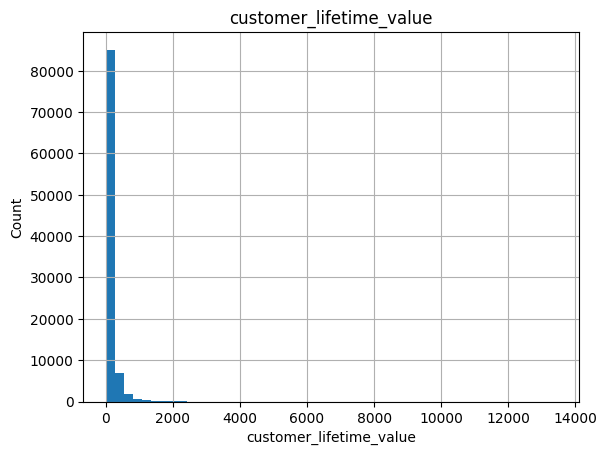

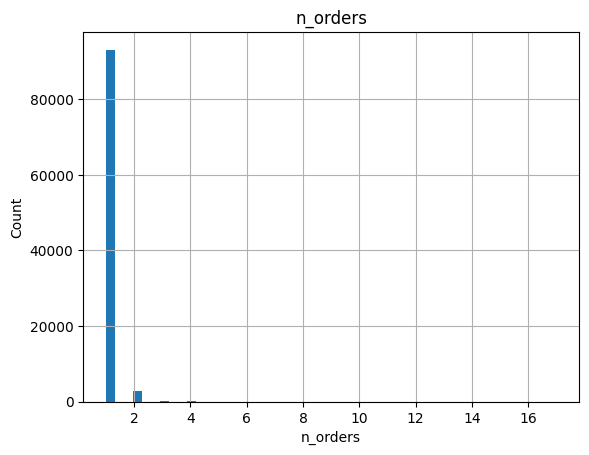

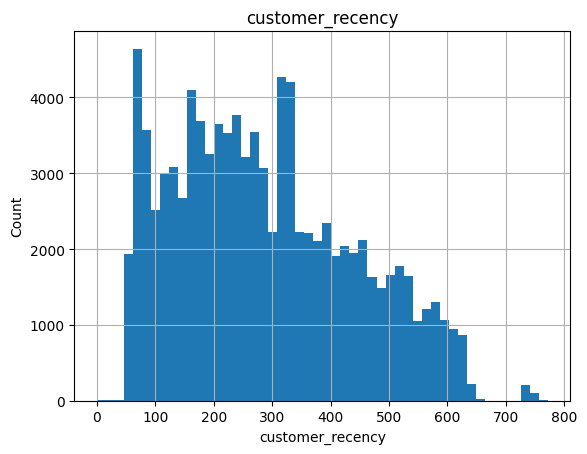

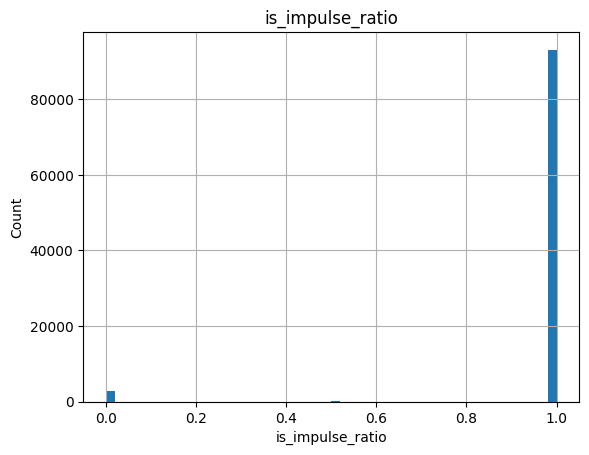

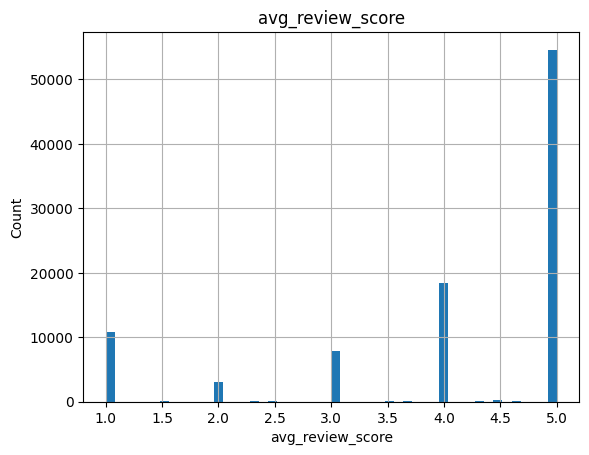

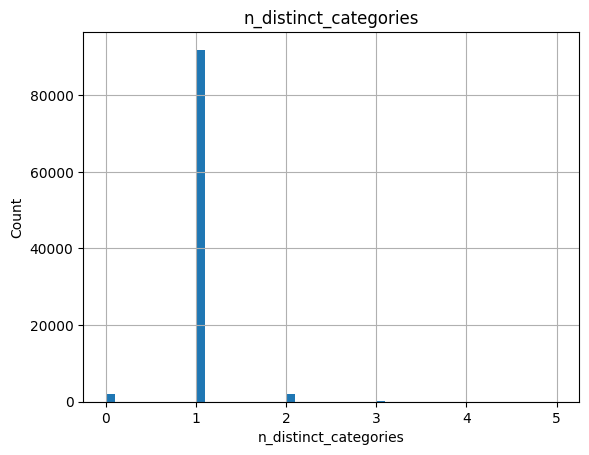

In [25]:


hist_cols = [
    "customer_lifetime_value",
    "n_orders",
    "customer_recency",
    "is_impulse_ratio",
    "avg_review_score",
    "n_distinct_categories",
]

for col in hist_cols:
    if col in master_df.columns:
        plt.figure()
        master_df[col].hist(bins=50)
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()
    else:
        print(f"Column {col} not in master_df")


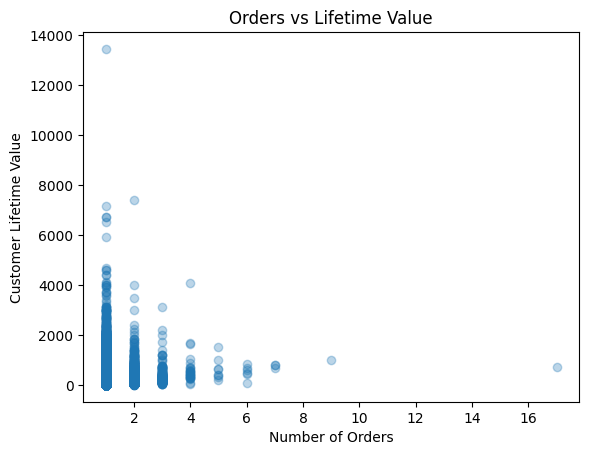

In [26]:
if {"n_orders", "customer_lifetime_value"}.issubset(master_df.columns):
    plt.figure()
    plt.scatter(
        master_df["n_orders"],
        master_df["customer_lifetime_value"],
        alpha=0.3
    )
    plt.xlabel("Number of Orders")
    plt.ylabel("Customer Lifetime Value")
    plt.title("Orders vs Lifetime Value")
    plt.show()


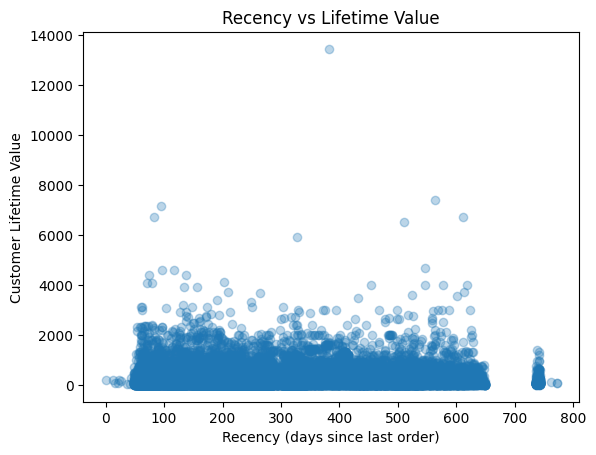

In [27]:
import matplotlib.pyplot as plt

if {"customer_recency", "customer_lifetime_value"}.issubset(master_df.columns):
    plt.figure()
    plt.scatter(
        master_df["customer_recency"],
        master_df["customer_lifetime_value"],
        alpha=0.3
    )
    plt.xlabel("Recency (days since last order)")
    plt.ylabel("Customer Lifetime Value")
    plt.title("Recency vs Lifetime Value")
    plt.show()
else:
    print("Missing columns for plot")


In [28]:
# Filter to customers with at least 1 order
active_customers = master_df[master_df["n_orders"] > 0].copy()
print("Active customers shape:", active_customers.shape)


Active customers shape: (96096, 32)


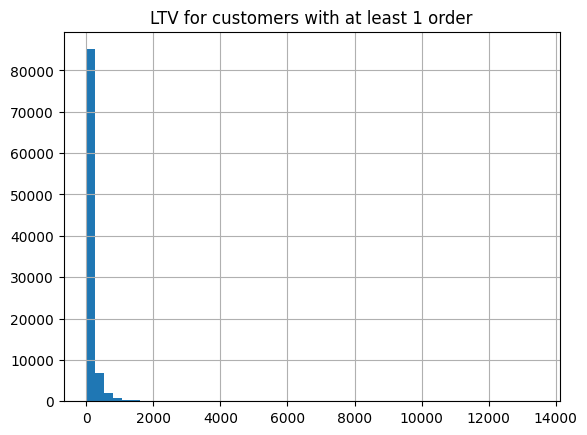

In [29]:
active_customers["customer_lifetime_value"].hist(bins=50)
plt.title("LTV for customers with at least 1 order")
plt.show()

In [30]:
# Create a unified n_distinct_sellers (take max of the two where both exist)
if "n_distinct_sellers_x" in master_df.columns and "n_distinct_sellers_y" in master_df.columns:
    master_df["n_distinct_sellers"] = master_df[
        ["n_distinct_sellers_x", "n_distinct_sellers_y"]
    ].max(axis=1)

    master_df = master_df.drop(columns=["n_distinct_sellers_x", "n_distinct_sellers_y"])

print("Columns after cleaning sellers:")
print([c for c in master_df.columns if "sellers" in c])

Columns after cleaning sellers:
['n_distinct_sellers']


In [31]:
active_customers = master_df[master_df["n_orders"] > 0].copy()

num_cols = active_customers.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric columns in active_customers:")
print(num_cols)


Numeric columns in active_customers:
['customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'customer_lifetime_value', 'n_distinct_sellers']


In [32]:
num_cols = active_customers.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric columns in active_customers:")
print(num_cols)

print("\nSummary stats for key columns:")
print(
    active_customers[
        [
            "customer_lifetime_value",
            "n_orders",
            "customer_recency",
            "customer_lifetime_days",
            "is_impulse_ratio",
            "avg_review_score",
            "n_distinct_categories",
            "n_distinct_sellers",
        ]
    ].describe().T
)


Numeric columns in active_customers:
['customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'customer_lifetime_value', 'n_distinct_sellers']

Summary stats for key columns:
                           count        mean         std   min    25%    50%  \
customer_lifetime_value  95420.0  142.440198  217.656355  0.85   47.9   89.9   
n_orders                 96096.0    1.034809    0.214384  1.00    1.0    1.0   
customer_recency         96096.0  287.735691  153.414676  0.00  163.0  268.0   
customer_lifetime_days   96096.0    2.711507   25.393343  0.00    0.0    0.0   
is_impulse_ratio         96096.0    0.970506    0.16

In [33]:
feature_cols = [
    "customer_lifetime_value",
    "n_orders",
    "customer_recency",
    "customer_lifetime_days",
    "avg_review_score",
    "n_distinct_categories",
    "n_distinct_sellers",
    "geolocation_lat",
    "geolocation_lng",
]

# Keep only columns that actually exist
feature_cols = [c for c in feature_cols if c in active_customers.columns]
print("Features for KMeans:", feature_cols)

# Feature matrix
X = active_customers[feature_cols].copy()
X = X.fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X shape:", X.shape)
print("X_scaled shape:", X_scaled.shape)

Features for KMeans: ['customer_lifetime_value', 'n_orders', 'customer_recency', 'customer_lifetime_days', 'avg_review_score', 'n_distinct_categories', 'n_distinct_sellers', 'geolocation_lat', 'geolocation_lng']
X shape: (96096, 9)
X_scaled shape: (96096, 9)


Inertias: [(2, 685488.9578861325), (3, 596509.1760529615), (4, 529940.189373794), (5, 479635.6535344503), (6, 430321.5124262269), (7, 386271.5233442955), (8, 347312.9642927107), (9, 328511.7787000722), (10, 314058.13780271244)]


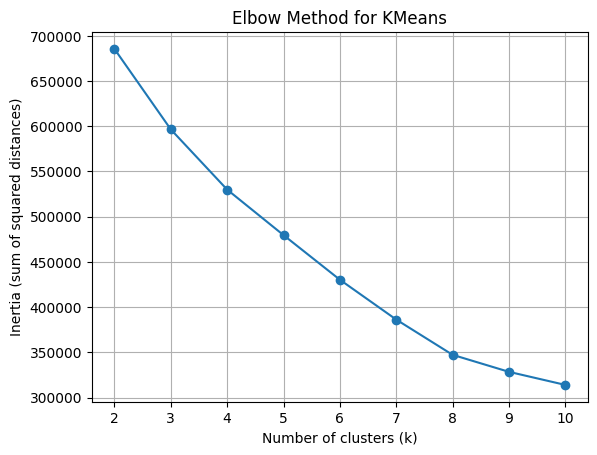

In [34]:
inertias = []
ks = range(2, 11)  # try k = 2 to 10

for k in ks:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,      # to avoid sklearn warning
    )
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

print("Inertias:", list(zip(ks, inertias)))

plt.figure()
plt.plot(ks, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow Method for KMeans")
plt.xticks(list(ks))
plt.grid(True)
plt.show()

In [35]:
k=4
kmeans_final = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10,
)
kmeans_final.fit(X_scaled)

# Cluster labels for each row in active_customers
active_customers["cluster"] = kmeans_final.labels_

print("Cluster counts:")
print(active_customers["cluster"].value_counts().sort_index())

Cluster counts:
cluster
0    64035
1    19043
2     2817
3    10201
Name: count, dtype: int64


In [36]:
cluster_means = active_customers.groupby("cluster")[
    [
        "customer_lifetime_value",
        "n_orders",
        "customer_recency",
        "customer_lifetime_days",
        "avg_review_score",
        "n_distinct_categories",
        "n_distinct_sellers",
    ]
].mean().round(2)

cluster_counts = active_customers["cluster"].value_counts().sort_index()

print("Cluster sizes:\n", cluster_counts, "\n")
print(cluster_means)


Cluster sizes:
 cluster
0    64035
1    19043
2     2817
3    10201
Name: count, dtype: int64 

         customer_lifetime_value  n_orders  customer_recency  \
cluster                                                        
0                         131.35      1.01            284.64   
1                         145.18      1.01            295.67   
2                         258.77      1.94            258.96   
3                         175.03      1.01            300.28   

         customer_lifetime_days  avg_review_score  n_distinct_categories  \
cluster                                                                    
0                          0.11              4.75                   0.99   
1                          0.16              1.86                   0.96   
2                         88.31              3.91                   1.78   
3                          0.16              3.95                   0.99   

         n_distinct_sellers  
cluster                      
0 

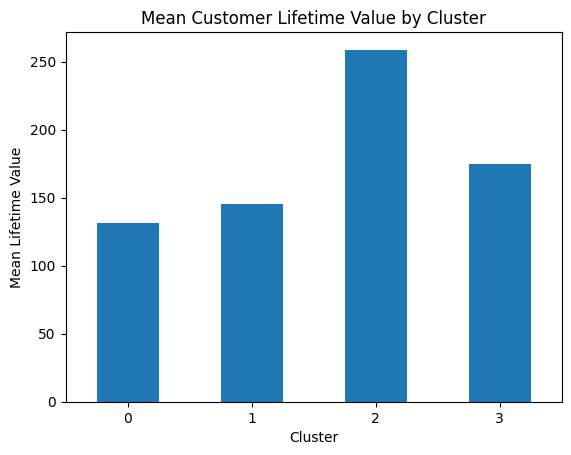

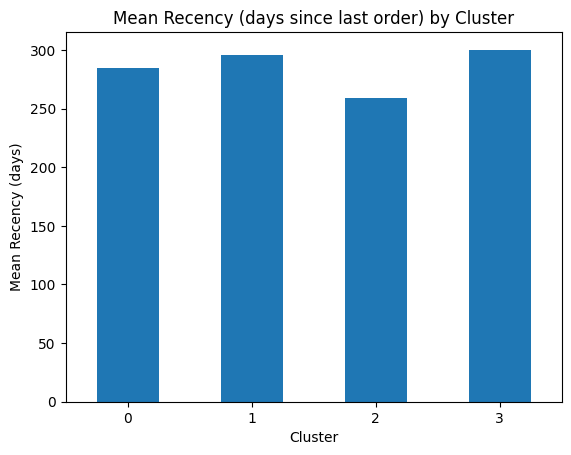

In [37]:
import matplotlib.pyplot as plt

#mean lifetime value per cluster
ltv_by_cluster = (
    active_customers
    .groupby("cluster")["customer_lifetime_value"]
    .mean()
    .round(2)
)



plt.figure()
ltv_by_cluster.plot(kind="bar")
plt.title("Mean Customer Lifetime Value by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Lifetime Value")
plt.xticks(rotation=0)
plt.show()



#Mean recency per cluster
recency_by_cluster = (
    active_customers
    .groupby("cluster")["customer_recency"]
    .mean()
    .round(2)
)



plt.figure()
recency_by_cluster.plot(kind="bar")
plt.title("Mean Recency (days since last order) by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Recency (days)")
plt.xticks(rotation=0)
plt.show()


<Figure size 640x480 with 0 Axes>

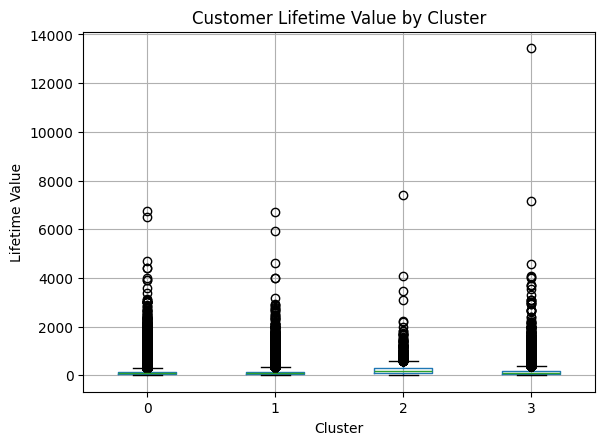

In [38]:
plt.figure()
active_customers.boxplot(
    column="customer_lifetime_value",
    by="cluster"
)
plt.title("Customer Lifetime Value by Cluster")
plt.suptitle("")
plt.xlabel("Cluster")
plt.ylabel("Lifetime Value")
plt.show()

In [39]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Overall average silhouette score
avg_silhouette_score = silhouette_score(X_scaled, kmeans_final.labels_)
print(f"The average Silhouette Score for k={kmeans_final.n_clusters} is: {avg_silhouette_score:.4f}")


The average Silhouette Score for k=4 is: 0.2949



Generating Silhouette Plot...


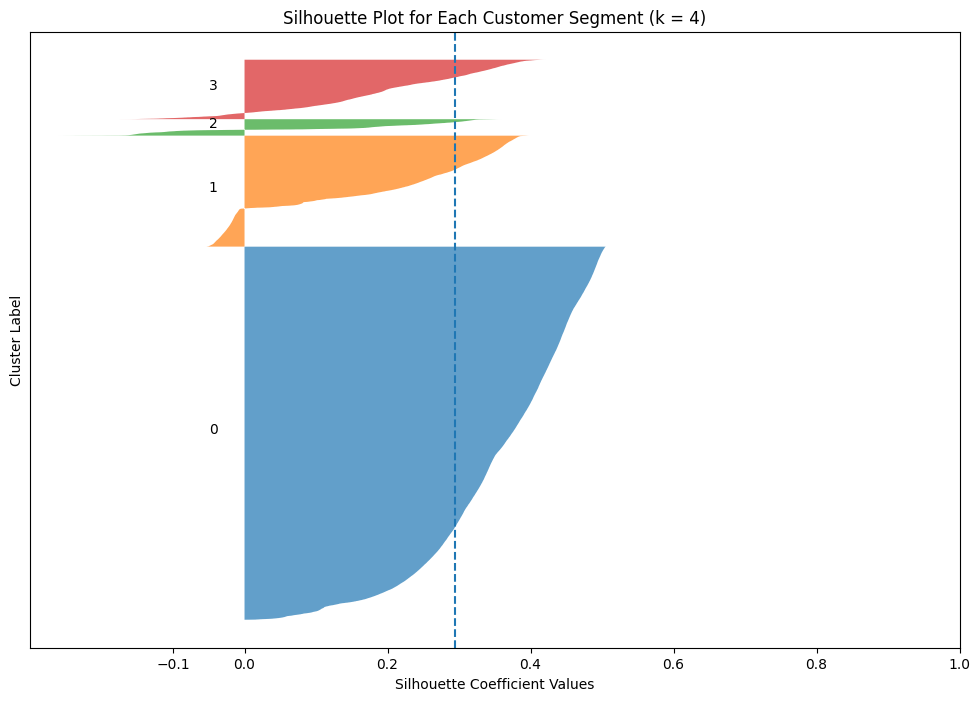

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Compute silhouette values for each sample
sample_silhouette_values = silhouette_samples(X_scaled, kmeans_final.labels_)

print("\nGenerating Silhouette Plot...")
plt.figure(figsize=(12, 8))

y_lower = 10
n_clusters = kmeans_final.n_clusters
labels = kmeans_final.labels_

for i in range(n_clusters):
    # Silhouette values for cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Horizontal silhouette bars for this cluster
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,  # transparency
    )

    # Label the cluster number
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Next cluster starts a bit lower for spacing
    y_lower = y_upper + 10

plt.title("Silhouette Plot for Each Customer Segment (k = 4)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")

# Vertical line for average silhouette score
plt.axvline(x=avg_silhouette_score, linestyle="--")

# Clean axes
plt.yticks([])
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.show()


In [41]:
from sklearn.model_selection import train_test_split

df = active_customers.copy()

y_cls = df["cluster"]

drop_cols = [
    "cluster",
    "customer_id",
    "customer_unique_id",
    "customer_zip_code_prefix",
    "first_order_date",
    "last_order_date",
    "last_review_date",
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

print("Columns remaining for features:", df.columns.tolist())

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("\nNumeric feature columns:", num_cols)
print("\nCategorical feature columns:", cat_cols)

df[num_cols] = df[num_cols].fillna(0)
df[cat_cols] = df[cat_cols].fillna("Unknown")

X_cls = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nFinal shape of X_cls (after one-hot):", X_cls.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

Columns remaining for features: ['cust_city', 'cust_state', 'geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'top_category', 'customer_lifetime_value', 'n_distinct_sellers']

Numeric feature columns: ['geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'customer_lifetime_value', 'n_distinct_sellers

In [42]:
X_train.head()

,geolocation_lat,geolocation_lng,n_orders,n_delivered,n_is_impulse,customer_recency,is_impulse_ratio,customer_lifetime_days,total_revenue,total_freight,...,top_category_security_and_services,top_category_signaling_and_security,top_category_small_appliances,top_category_small_appliances_home_oven_and_coffee,top_category_sports_leisure,top_category_stationery,top_category_tablets_printing_image,top_category_telephony,top_category_toys,top_category_watches_gifts
30519,-0.862741,-48.135873,1,0,0,442,0.0,0,89.99,25.91,...,False,False,False,False,False,False,False,False,False,False
51681,-22.427802,-44.306273,2,2,0,227,1.0,0,263.80,33.85,...,False,False,False,False,False,False,False,False,False,False
2041,-23.472641,-46.554052,2,2,0,248,1.0,0,278.90,52.48,...,False,False,False,False,False,False,False,False,False,False
62139,-18.998345,-46.309358,1,1,0,292,1.0,0,38.90,44.81,...,False,False,False,False,False,False,False,False,True,False
44913,-23.012987,-43.465520,1,1,0,363,1.0,0,169.99,36.85,...,False,False,False,False,False,False,False,False,False,False


we have cust_city and state  which is giving too many columns as we are using one-hot encoding. This is redundant information as we already have geolat and geolong and this points clearly gives us the location information without the city and state.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = active_customers.copy()

# Target
y_cls = df["cluster"]

# Drop columns we don't want as features
drop_cols = [
    "cluster",
    "customer_id",
    "customer_unique_id",
    "customer_zip_code_prefix",
    "first_order_date",
    "last_order_date",
    "last_review_date",
    "cust_city",    # drop, we have lat/lng
    "cust_state",   # drop, we have lat/lng
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# Identify numeric & categorical
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)  # should be mostly things like top_category

# Fill missing
df[num_cols] = df[num_cols].fillna(0)
df[cat_cols] = df[cat_cols].fillna("Unknown")

# One-hot encode remaining categoricals (e.g. top_category)
X_cls = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("Final X_cls shape:", X_cls.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Numeric: ['geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'customer_lifetime_value', 'n_distinct_sellers']
Categorical: ['top_category']
Final X_cls shape: (96096, 93)
Train shape: (76876, 93)  Test shape: (19220, 93)


In [44]:
X_train.head()

,geolocation_lat,geolocation_lng,n_orders,n_delivered,n_is_impulse,customer_recency,is_impulse_ratio,customer_lifetime_days,total_revenue,total_freight,...,top_category_security_and_services,top_category_signaling_and_security,top_category_small_appliances,top_category_small_appliances_home_oven_and_coffee,top_category_sports_leisure,top_category_stationery,top_category_tablets_printing_image,top_category_telephony,top_category_toys,top_category_watches_gifts
30519,-0.862741,-48.135873,1,0,0,442,0.0,0,89.99,25.91,...,False,False,False,False,False,False,False,False,False,False
51681,-22.427802,-44.306273,2,2,0,227,1.0,0,263.80,33.85,...,False,False,False,False,False,False,False,False,False,False
2041,-23.472641,-46.554052,2,2,0,248,1.0,0,278.90,52.48,...,False,False,False,False,False,False,False,False,False,False
62139,-18.998345,-46.309358,1,1,0,292,1.0,0,38.90,44.81,...,False,False,False,False,False,False,False,False,True,False
44913,-23.012987,-43.465520,1,1,0,363,1.0,0,169.99,36.85,...,False,False,False,False,False,False,False,False,False,False


In [45]:
from sklearn.preprocessing import StandardScaler
import joblib

# We already have: X_train, X_test, y_train, y_test

# --- SVM scaling: recreate the scaler on X_train (same as when training) ---
svm_scaler = StandardScaler()
X_train_svm = svm_scaler.fit_transform(X_train)
X_test_svm = svm_scaler.transform(X_test)

print("X_train_svm shape:", X_train_svm.shape)
print("X_test_svm shape:", X_test_svm.shape)

# --- KNN scaling: use saved scaler_knn.pkl ---
knn_scaler = joblib.load("scaler_knn.pkl")
X_test_knn = knn_scaler.transform(X_test)
print("X_test_knn shape:", X_test_knn.shape)


X_train_svm shape: (76876, 93)
X_test_svm shape: (19220, 93)
X_test_knn shape: (19220, 93)


In [46]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import pandas as pd
import joblib

models_specs = []

def safe_load_model(filename, name, X_variant):
    """Helper to load a model and append spec if file exists."""
    try:
        model = joblib.load(filename)
        models_specs.append((name, model, X_variant))
        print(f"Loaded: {name} from {filename}")
    except Exception as e:
        print(f"Could not load {filename} ({name}): {e}")

# Models that use raw X_test (no scaling needed)
safe_load_model("model_logreg.pkl",           "Logistic Regression", "X")
safe_load_model("model_decision_tree.pkl",    "Decision Tree",       "X")
safe_load_model("model_random_forest.pkl",    "Random Forest",       "X")
safe_load_model("model_gradient_boosting.pkl","Gradient Boosting",   "X")
safe_load_model("model_adaboost.pkl",         "AdaBoost",            "X")
safe_load_model("model_xgboost.pkl",          "XGBoost",             "X")

# SVMs use X_test_svm  (we can ignore them later if we decide not to use SVMs)
safe_load_model("model_linearsvc.pkl",        "LinearSVC",          "X_svm")
safe_load_model("model_svc_linear.pkl",       "SVC (linear)",       "X_svm")
safe_load_model("model_svc_rbf.pkl",          "SVC (RBF)",          "X_svm")
safe_load_model("model_svc_poly.pkl",         "SVC (poly)",         "X_svm")

# KNN uses X_test_knn
safe_load_model("model_knn.pkl",              "KNN",               "X_knn")

print("\nLoaded models:")
print(pd.DataFrame(models_specs, columns=["name", "model", "X_variant"])[["name", "X_variant"]])


Loaded: Logistic Regression from model_logreg.pkl
Loaded: Decision Tree from model_decision_tree.pkl
Loaded: Random Forest from model_random_forest.pkl
Loaded: Gradient Boosting from model_gradient_boosting.pkl
Loaded: AdaBoost from model_adaboost.pkl
Loaded: XGBoost from model_xgboost.pkl
Loaded: LinearSVC from model_linearsvc.pkl
Loaded: SVC (linear) from model_svc_linear.pkl
Loaded: SVC (RBF) from model_svc_rbf.pkl
Loaded: SVC (poly) from model_svc_poly.pkl
Loaded: KNN from model_knn.pkl

Loaded models:
                   name X_variant
0   Logistic Regression         X
1         Decision Tree         X
2         Random Forest         X
3     Gradient Boosting         X
4              AdaBoost         X
5               XGBoost         X
6             LinearSVC     X_svm
7          SVC (linear)     X_svm
8             SVC (RBF)     X_svm
9            SVC (poly)     X_svm
10                  KNN     X_knn


In [47]:
from sklearn.metrics import accuracy_score
import pandas as pd

accuracy_rows = []

for name, model, X_variant in models_specs:
    # Pick the correct X for this model
    if X_variant == "X":
        X_use = X_test
    elif X_variant == "X_svm":
        X_use = X_test_svm
    elif X_variant == "X_knn":
        X_use = X_test_knn
    else:
        print(f"Skipping {name} – unknown X_variant {X_variant}")
        continue

    # Predict and compute accuracy
    y_pred = model.predict(X_use)
    acc = accuracy_score(y_test, y_pred)

    print(f"{name}: accuracy = {acc:.4f}")
    accuracy_rows.append({"Model": name, "Accuracy": acc})

accuracy_df = pd.DataFrame(accuracy_rows).sort_values("Accuracy", ascending=False)
accuracy_df


Logistic Regression: accuracy = 0.9706
Decision Tree: accuracy = 0.9972
Random Forest: accuracy = 0.9969
Gradient Boosting: accuracy = 0.9989
AdaBoost: accuracy = 0.9896
XGBoost: accuracy = 0.9988
LinearSVC: accuracy = 0.9968
SVC (linear): accuracy = 0.9991
SVC (RBF): accuracy = 0.9953
SVC (poly): accuracy = 0.9953
KNN: accuracy = 0.9775


,Model,Accuracy
7,SVC (linear),0.999063
3,Gradient Boosting,0.998855
5,XGBoost,0.998751
1,Decision Tree,0.997242
2,Random Forest,0.996878
6,LinearSVC,0.996826
9,SVC (poly),0.995265
8,SVC (RBF),0.995265
4,AdaBoost,0.989646
10,KNN,0.977471


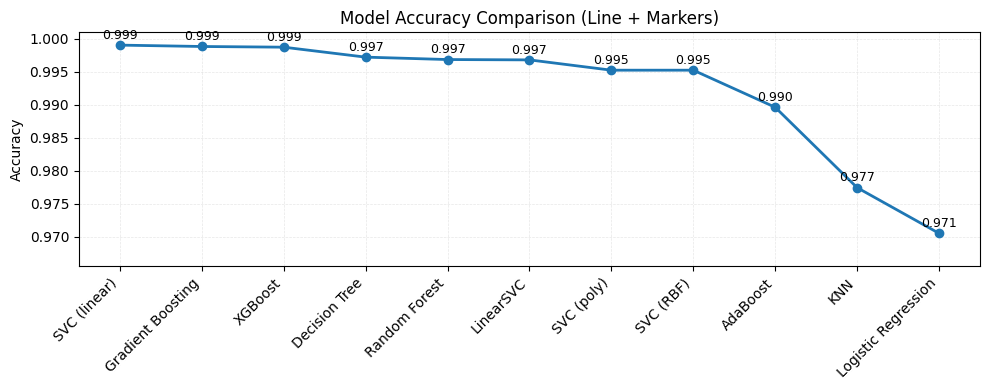

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure models are in a fixed order (already sorted by accuracy)
models = accuracy_df["Model"].tolist()
accs   = accuracy_df["Accuracy"].tolist()

x = np.arange(len(models))

plt.figure(figsize=(10, 4))

# Line + markers for accuracy
plt.plot(x, accs, marker="o", linewidth=2)

# Add a light grid and annotate each point with its value
for i, (mx, a) in enumerate(zip(x, accs)):
    plt.text(mx, a + 0.0005, f"{a:.3f}", ha="center", va="bottom", fontsize=9)

plt.xticks(x, models, rotation=45, ha="right")
plt.ylim(min(accs) - 0.005, 1.001)  # tight zoom around your accuracies
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Line + Markers)")
plt.grid(alpha=0.3, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1377972445.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(models))  # or "viridis", "plasma", etc.


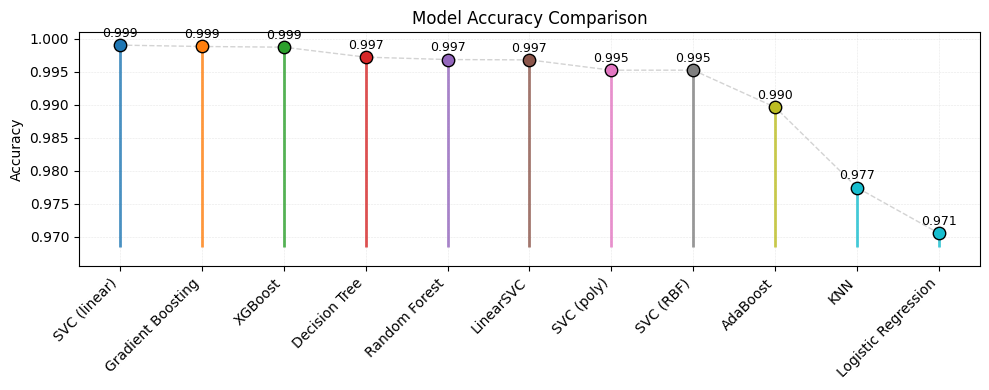

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Sorted models and accuracies
models = accuracy_df["Model"].tolist()
accs   = accuracy_df["Accuracy"].tolist()

x = np.arange(len(models))

plt.figure(figsize=(10, 4))

# Use a colormap so each model gets its own color
cmap = plt.cm.get_cmap("tab10", len(models))  # or "viridis", "plasma", etc.

# Light grey connecting line for shape
plt.plot(x, accs, color="lightgrey", linewidth=1, linestyle="--", zorder=1)

# Colored points + short vertical segments
for i, (mx, a) in enumerate(zip(x, accs)):
    color = cmap(i)
    # small vertical line
    plt.vlines(mx, min(accs) - 0.002, a, colors=color, linewidth=2, alpha=0.8)
    # point
    plt.scatter(mx, a, color=color, s=80, edgecolor="black", zorder=3)
    # label on top
    plt.text(mx, a + 0.0008, f"{a:.3f}", ha="center", va="bottom", fontsize=9)

plt.xticks(x, models, rotation=45, ha="right")
plt.ylim(min(accs) - 0.005, 1.001)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(alpha=0.3, linestyle="--", linewidth=0.4)
plt.tight_layout()
plt.show()


In [51]:
from sklearn.metrics import f1_score
import pandas as pd

f1_rows = []

for name, model, X_variant in models_specs:
    # Pick the right X for this model
    if X_variant == "X":
        X_use = X_test
    elif X_variant == "X_svm":
        X_use = X_test_svm
    elif X_variant == "X_knn":
        X_use = X_test_knn
    else:
        print(f"Skipping {name} – unknown X_variant {X_variant}")
        continue

    y_pred = model.predict(X_use)
    f1 = f1_score(y_test, y_pred, average="macro")

    print(f"{name}: macro F1 = {f1:.4f}")
    f1_rows.append({"Model": name, "Macro_F1": f1})

f1_df = pd.DataFrame(f1_rows).sort_values("Macro_F1", ascending=False)
f1_df


Logistic Regression: macro F1 = 0.9237
Decision Tree: macro F1 = 0.9930
Random Forest: macro F1 = 0.9937
Gradient Boosting: macro F1 = 0.9975
AdaBoost: macro F1 = 0.9727
XGBoost: macro F1 = 0.9973
LinearSVC: macro F1 = 0.9929
SVC (linear): macro F1 = 0.9979
SVC (RBF): macro F1 = 0.9902
SVC (poly): macro F1 = 0.9902
KNN: macro F1 = 0.9606


,Model,Macro_F1
7,SVC (linear),0.997924
3,Gradient Boosting,0.997456
5,XGBoost,0.997255
2,Random Forest,0.993687
1,Decision Tree,0.993021
6,LinearSVC,0.992941
9,SVC (poly),0.990228
8,SVC (RBF),0.990228
4,AdaBoost,0.972713
10,KNN,0.960649


/tmp/ipython-input-4231596377.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(models_f1))


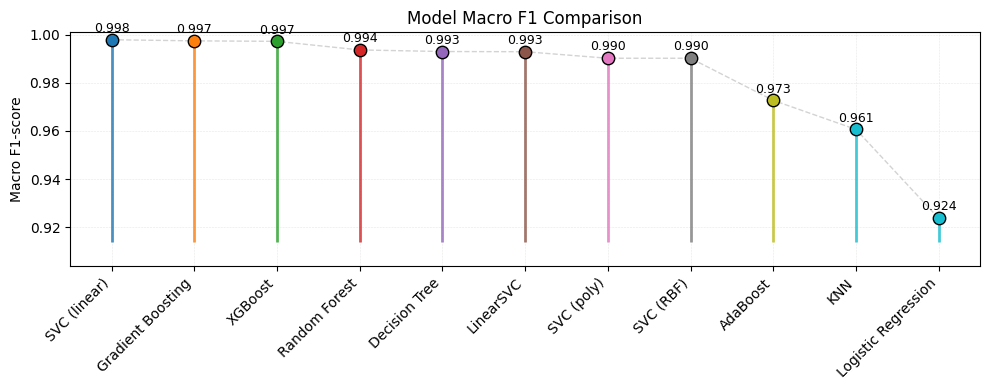

In [52]:
import matplotlib.pyplot as plt
import numpy as np

models_f1 = f1_df["Model"].tolist()
f1_vals   = f1_df["Macro_F1"].tolist()

x = np.arange(len(models_f1))

plt.figure(figsize=(10, 4))

cmap = plt.cm.get_cmap("tab10", len(models_f1))

# Light guide line
plt.plot(x, f1_vals, color="lightgrey", linewidth=1, linestyle="--", zorder=1)

for i, (mx, f1) in enumerate(zip(x, f1_vals)):
    color = cmap(i)
    plt.vlines(mx, min(f1_vals) - 0.01, f1, colors=color, linewidth=2, alpha=0.8)
    plt.scatter(mx, f1, color=color, s=80, edgecolor="black", zorder=3)
    plt.text(mx, f1 + 0.002, f"{f1:.3f}", ha="center", va="bottom", fontsize=9)

plt.xticks(x, models_f1, rotation=45, ha="right")
plt.ylim(min(f1_vals) - 0.02, 1.001)
plt.ylabel("Macro F1-score")
plt.title("Model Macro F1 Comparison")
plt.grid(alpha=0.3, linestyle="--", linewidth=0.4)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3562690581.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(roc_models))


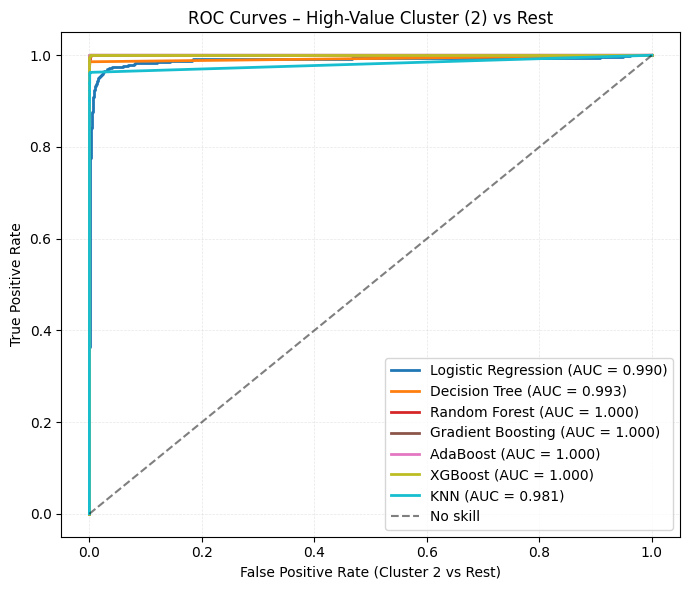

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binary labels: 1 if cluster 2 (high-value), else 0
y_bin_hv = (y_test == 2).astype(int)

# Which models to include in ROC comparison (must match names in models_specs)
roc_models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "AdaBoost",
    "XGBoost",
    "KNN",
]

# Build dict from name -> (model, X_variant)
model_dict = {name: (model, X_variant) for (name, model, X_variant) in models_specs}

plt.figure(figsize=(7, 6))

cmap = plt.cm.get_cmap("tab10", len(roc_models))
curve_idx = 0

for mdl_name in roc_models:
    if mdl_name not in model_dict:
        print(f"Skipping {mdl_name} – not in models_specs")
        continue

    model, X_variant = model_dict[mdl_name]

    # Choose which X to use
    if X_variant == "X":
        X_use = X_test
    elif X_variant == "X_knn":
        X_use = X_test_knn
    else:
        # We are skipping SVMs, so no X_svm here
        print(f"Skipping {mdl_name} – unsupported X_variant {X_variant}")
        continue

    # Get scores for cluster 2
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_use)
        scores = proba[:, 2]  # probability of class 2
    else:
        print(f"Skipping {mdl_name} – no predict_proba for ROC")
        continue

    fpr, tpr, _ = roc_curve(y_bin_hv, scores)
    roc_auc = auc(fpr, tpr)

    color = cmap(curve_idx)
    plt.plot(fpr, tpr, label=f"{mdl_name} (AUC = {roc_auc:.3f})", linewidth=2, color=color)
    curve_idx += 1

# No-skill line
plt.plot([0, 1], [0, 1], "k--", alpha=0.5, label="No skill")

plt.xlabel("False Positive Rate (Cluster 2 vs Rest)")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – High-Value Cluster (2) vs Rest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [54]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

# 1) Rebuild full dataset
X_all = pd.concat([X_train, X_test], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)

print("X_all shape:", X_all.shape)
print("y_all distribution:")
print(y_all.value_counts(normalize=True))

# 2) Build scaled versions for SVM and KNN
# SVM: reuse existing svm_scaler (fit on X_train earlier)
try:
    X_all_svm = svm_scaler.transform(X_all)
    print("X_all_svm shape:", X_all_svm.shape)
except NameError:
    X_all_svm = None
    print("svm_scaler not found; SVM models will be skipped in CV.")

# KNN: reuse knn_scaler loaded earlier
try:
    X_all_knn = knn_scaler.transform(X_all)
    print("X_all_knn shape:", X_all_knn.shape)
except NameError:
    X_all_knn = None
    print("knn_scaler not found; KNN will be skipped in CV.")

# 3) Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []

for name, model, X_variant in models_specs:
    # pick X for this model
    if X_variant == "X":
        X_use = X_all
    elif X_variant == "X_svm":
        if X_all_svm is None:
            print(f"Skipping {name} in CV – no X_all_svm.")
            continue
        X_use = X_all_svm
    elif X_variant == "X_knn":
        if X_all_knn is None:
            print(f"Skipping {name} in CV – no X_all_knn.")
            continue
        X_use = X_all_knn
    else:
        print(f"Skipping {name} in CV – unknown X_variant {X_variant}.")
        continue

    print(f"\nCross-validating {name}...")
    scores = cross_val_score(
        model,
        X_use,
        y_all,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1,
    )

    rows.append({
        "Model": name,
        "Mean_Accuracy": scores.mean(),
        "Std_Accuracy": scores.std(),
    })

# 4) Build nice table with mean ± std in %
cv_df = pd.DataFrame(rows).sort_values("Mean_Accuracy", ascending=False)

cv_df["Accuracy_%"] = (cv_df["Mean_Accuracy"] * 100).round(2)
cv_df["Std_%"]      = (cv_df["Std_Accuracy"] * 100).round(2)
cv_df["Formatted"]  = cv_df["Accuracy_%"].astype(str) + " ± " + cv_df["Std_%"].astype(str)

cv_df[["Model", "Formatted"]]


X_all shape: (96096, 93)
y_all distribution:
cluster
0    0.666365
1    0.198166
3    0.106154
2    0.029314
Name: proportion, dtype: float64
X_all_svm shape: (96096, 93)
X_all_knn shape: (96096, 93)

Cross-validating Logistic Regression...

Cross-validating Decision Tree...

Cross-validating Random Forest...

Cross-validating Gradient Boosting...

Cross-validating AdaBoost...

Cross-validating XGBoost...

Cross-validating LinearSVC...

Cross-validating SVC (linear)...

Cross-validating SVC (RBF)...

Cross-validating SVC (poly)...

Cross-validating KNN...


,Model,Formatted
7,SVC (linear),99.91 ± 0.01
5,XGBoost,99.87 ± 0.02
3,Gradient Boosting,99.85 ± 0.04
1,Decision Tree,99.69 ± 0.05
6,LinearSVC,99.63 ± 0.03
2,Random Forest,99.61 ± 0.07
9,SVC (poly),99.46 ± 0.05
8,SVC (RBF),99.46 ± 0.05
4,AdaBoost,98.86 ± 0.07
10,KNN,97.73 ± 0.12


/tmp/ipython-input-3623905090.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(roc_models))


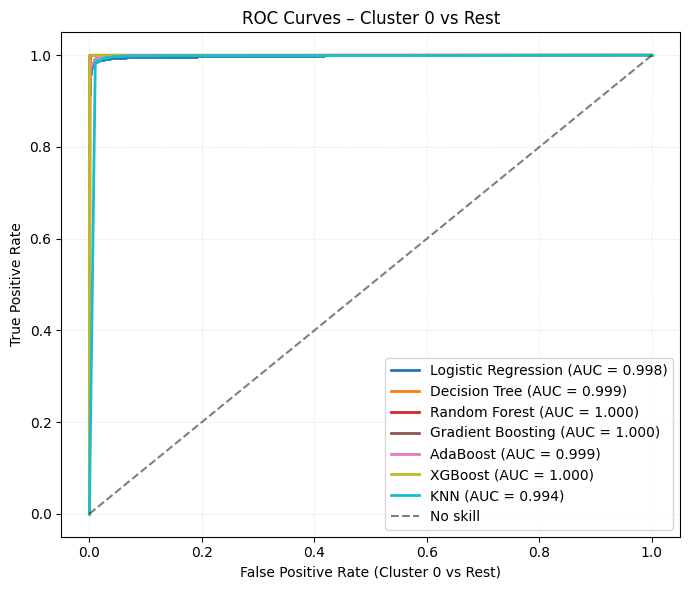

/tmp/ipython-input-3623905090.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(roc_models))


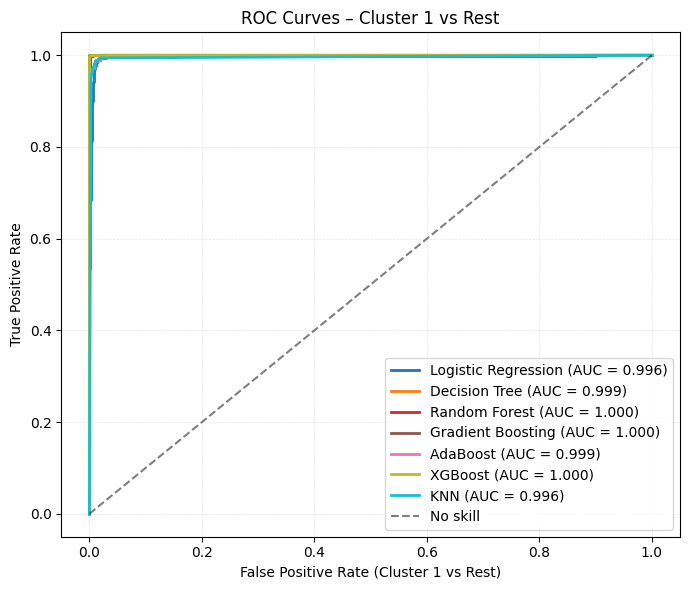

/tmp/ipython-input-3623905090.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(roc_models))


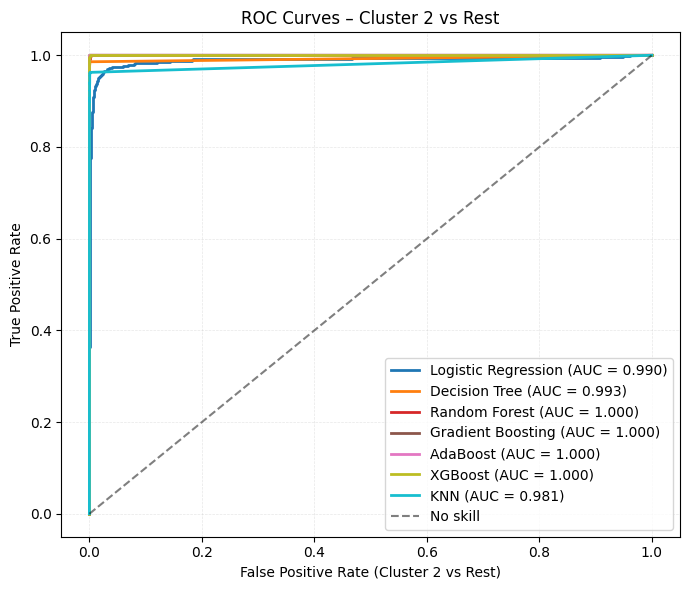

/tmp/ipython-input-3623905090.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(roc_models))


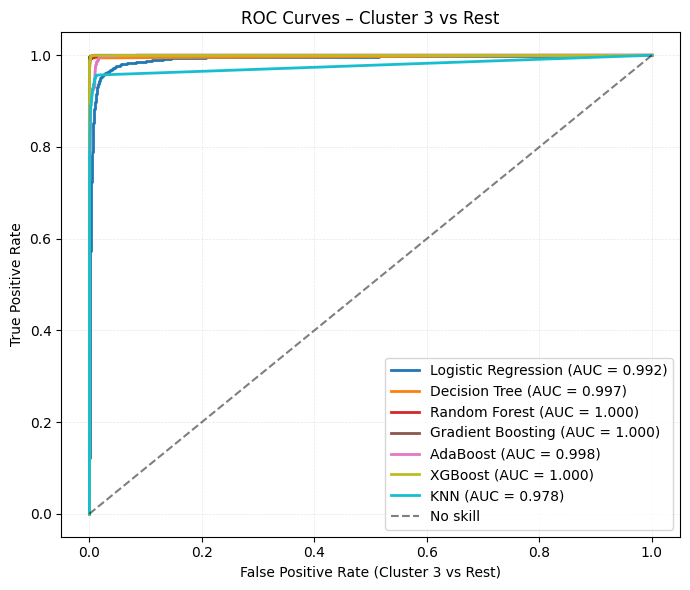

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Build dict from name -> (model, X_variant)
model_dict = {name: (model, X_variant) for (name, model, X_variant) in models_specs}

# Which models to include in ROC comparison (must match names in models_specs)
roc_models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "AdaBoost",
    "XGBoost",
    "KNN",
]

def plot_roc_one_vs_rest(target_label, y_test, roc_models, model_dict,
                         X_test, X_test_knn):
    """Plot ROC curves for (target_label vs rest) for all selected models."""
    # Binary labels: 1 if target_label, else 0
    y_bin = (y_test == target_label).astype(int)

    plt.figure(figsize=(7, 6))

    cmap = plt.cm.get_cmap("tab10", len(roc_models))
    curve_idx = 0

    for mdl_name in roc_models:
        if mdl_name not in model_dict:
            print(f"Skipping {mdl_name} – not in models_specs")
            continue

        model, X_variant = model_dict[mdl_name]

        # Choose which X to use
        if X_variant == "X":
            X_use = X_test
        elif X_variant == "X_knn":
            X_use = X_test_knn
        else:
            # We are skipping SVMs, so no X_svm here
            print(f"Skipping {mdl_name} – unsupported X_variant {X_variant}")
            continue

        # Get scores for this target_label
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(X_use)

            # Find index of the target label in model.classes_
            if target_label not in model.classes_:
                print(f"Skipping {mdl_name} – target label {target_label} not in model.classes_")
                continue

            class_idx = np.where(model.classes_ == target_label)[0][0]
            scores = proba[:, class_idx]
        else:
            print(f"Skipping {mdl_name} – no predict_proba for ROC")
            continue

        fpr, tpr, _ = roc_curve(y_bin, scores)
        roc_auc = auc(fpr, tpr)

        color = cmap(curve_idx)
        plt.plot(
            fpr, tpr,
            label=f"{mdl_name} (AUC = {roc_auc:.3f})",
            linewidth=2,
            color=color
        )
        curve_idx += 1

    # No-skill line
    plt.plot([0, 1], [0, 1], "k--", alpha=0.5, label="No skill")

    plt.xlabel(f"False Positive Rate (Cluster {target_label} vs Rest)")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves – Cluster {target_label} vs Rest")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3, linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


# === Call this for each label you care about ===
for lbl in [0, 1, 2, 3]:   # or [0, 1, 3] if you want to skip 2
    plot_roc_one_vs_rest(lbl, y_test, roc_models, model_dict, X_test, X_test_knn)


Features used for cluster boxplots: ['customer_lifetime_value', 'n_orders', 'customer_recency', 'is_impulse_ratio', 'avg_review_score', 'n_distinct_categories']


/tmp/ipython-input-3443096420.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3443096420.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3443096420.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3443096420.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3443096420.py:26: FutureWarning: 

Passin

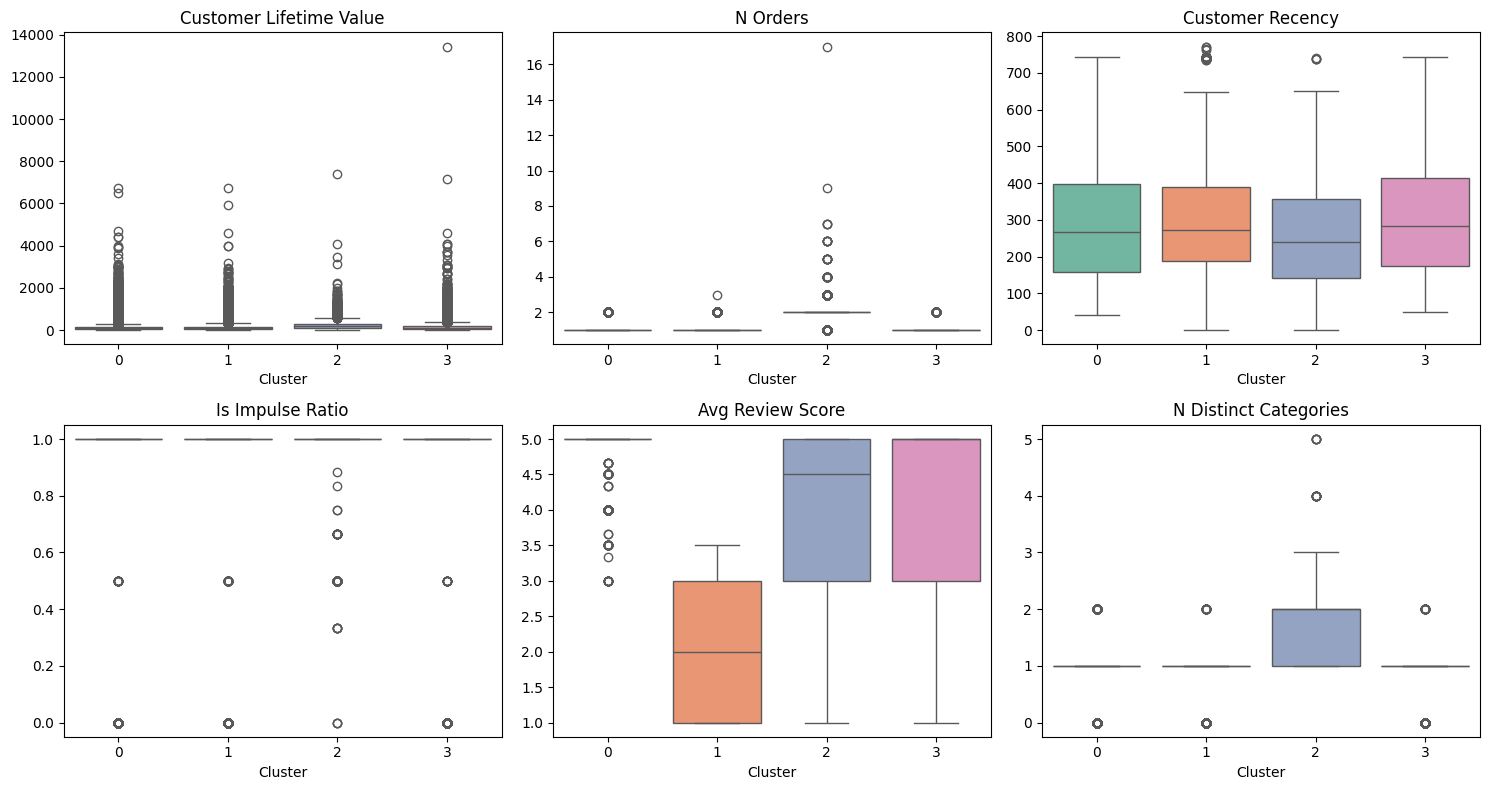

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Key features to profile per cluster
cluster_features = [
    "customer_lifetime_value",
    "n_orders",
    "customer_recency",
    "is_impulse_ratio",
    "avg_review_score",
    "n_distinct_categories",
]

# Make sure they exist
cluster_features = [f for f in cluster_features if f in active_customers.columns]
print("Features used for cluster boxplots:", cluster_features)

n_feats = len(cluster_features)
n_cols = 3
n_rows = (n_feats + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, feat in enumerate(cluster_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(
        data=active_customers,
        x="cluster",
        y=feat,
        palette="Set2"
    )
    plt.title(feat.replace("_", " ").title())
    plt.xlabel("Cluster")
    plt.ylabel("")

plt.tight_layout()
plt.show()


Radar features: ['customer_lifetime_value', 'n_orders', 'customer_recency', 'avg_review_score', 'n_distinct_categories']
         customer_lifetime_value  n_orders  customer_recency  \
cluster                                                        
0                       0.000000  0.000000          0.621521   
1                       0.108547  0.001973          0.888345   
2                       1.000000  1.000000          0.000000   
3                       0.342772  0.001457          1.000000   

         avg_review_score  n_distinct_categories  
cluster                                           
0                1.000000               0.037236  
1                0.000000               0.000000  
2                0.708425               1.000000  
3                0.723383               0.036030  


/tmp/ipython-input-2790007395.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", cluster_means_norm.shape[0])


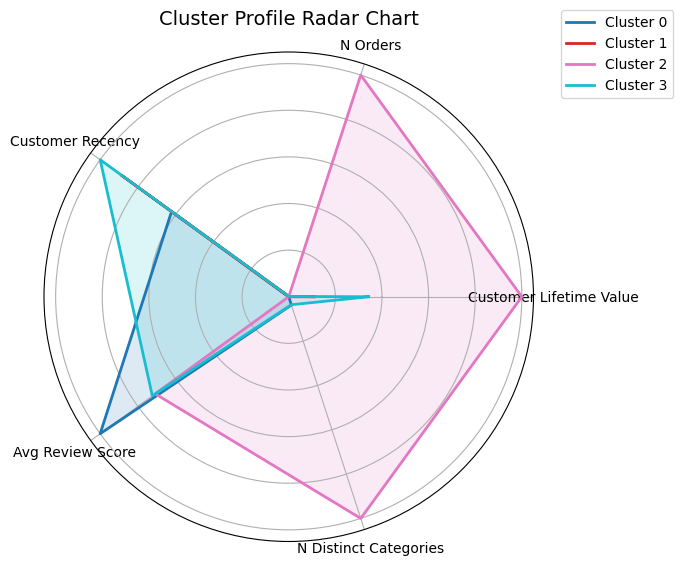

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Features to use in radar chart (subset of above, keep it 4–6)
radar_features = [
    "customer_lifetime_value",
    "n_orders",
    "customer_recency",
    "avg_review_score",
    "n_distinct_categories",
]

radar_features = [f for f in radar_features if f in active_customers.columns]
print("Radar features:", radar_features)

# Compute mean per cluster
cluster_means = (
    active_customers
    .groupby("cluster")[radar_features]
    .mean()
)

# Min–max normalize each feature to [0,1] for comparability
cluster_means_norm = (cluster_means - cluster_means.min()) / (
    cluster_means.max() - cluster_means.min()
)

print(cluster_means_norm)

# Radar setup
labels = radar_features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # close the loop

plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

cmap = plt.cm.get_cmap("tab10", cluster_means_norm.shape[0])

for idx, (cluster_id, row) in enumerate(cluster_means_norm.iterrows()):
    values = row.values
    values = np.concatenate((values, [values[0]]))  # close the loop

    ax.plot(
        angles,
        values,
        label=f"Cluster {cluster_id}",
        linewidth=2,
        color=cmap(idx),
    )
    ax.fill(angles, values, alpha=0.15, color=cmap(idx))

ax.set_xticks(angles[:-1])
ax.set_xticklabels([lbl.replace("_", " ").title() for lbl in labels])
ax.set_yticklabels([])  # hide radial labels, focus on shape
ax.set_title("Cluster Profile Radar Chart", fontsize=14, pad=20)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


GEOGRAPHIC SCATTER OF CLUSTERS

Geo df shape: (95828, 3)
Plotting a sample of 20000 points.


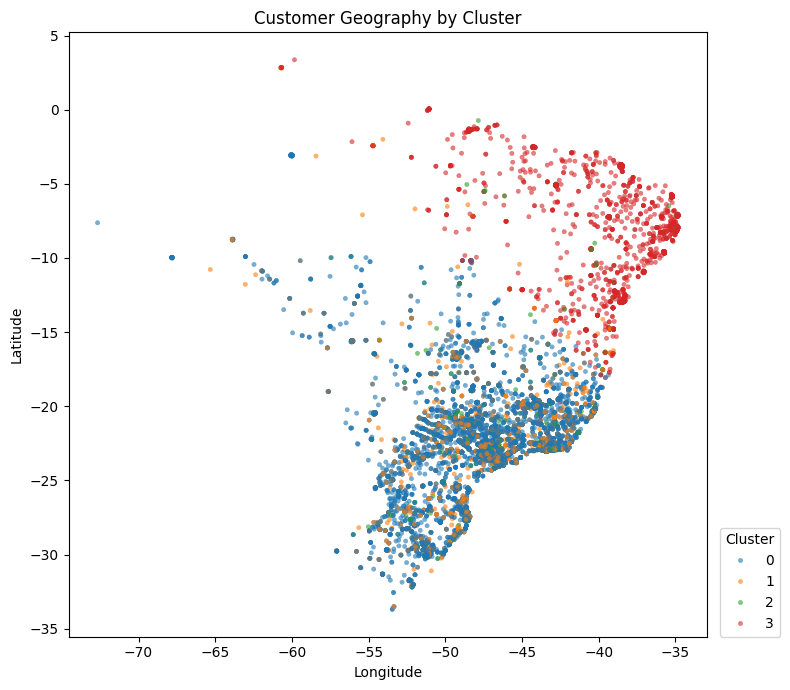

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only rows with lat/lng and cluster
geo_cols = ["geolocation_lat", "geolocation_lng", "cluster"]
geo_df = active_customers.dropna(subset=geo_cols)[geo_cols].copy()

print("Geo df shape:", geo_df.shape)

# (Optional) sample if it's huge, to speed up plotting
sample_n = 20000
if len(geo_df) > sample_n:
    geo_df_plot = geo_df.sample(sample_n, random_state=42)
    print(f"Plotting a sample of {sample_n} points.")
else:
    geo_df_plot = geo_df

plt.figure(figsize=(8, 7))
sns.scatterplot(
    data=geo_df_plot,
    x="geolocation_lng",
    y="geolocation_lat",
    hue="cluster",
    palette="tab10",
    s=10,
    alpha=0.6,
    edgecolor=None,
)

plt.title("Customer Geography by Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster", loc="lower left", bbox_to_anchor=(1.02, 0), borderaxespad=0.)
plt.tight_layout()
plt.show()



Top 15 features for Random Forest:
                    feature  importance
17         avg_review_score    0.287099
18            n_low_reviews    0.251615
0           geolocation_lat    0.181612
1           geolocation_lng    0.122739
21       n_distinct_sellers    0.026569
19    n_distinct_categories    0.021309
9             total_freight    0.017873
3               n_delivered    0.015780
16                n_reviews    0.012407
2                  n_orders    0.011330
7    customer_lifetime_days    0.008882
6          is_impulse_ratio    0.007163
13      total_payment_value    0.004567
10          avg_order_value    0.004365
20  customer_lifetime_value    0.004111


/tmp/ipython-input-2648388742.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis")


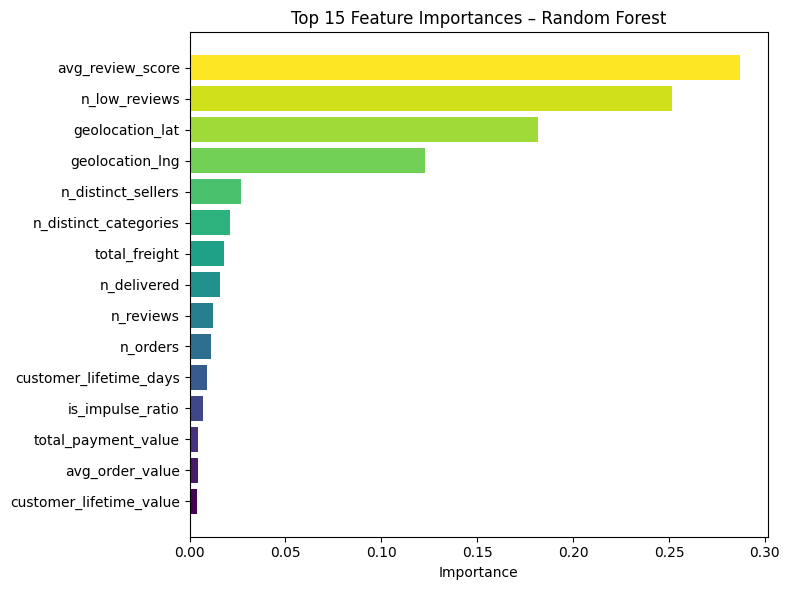


Top 15 features for XGBoost:
                         feature  importance
17              avg_review_score    0.547591
0                geolocation_lat    0.165607
21            n_distinct_sellers    0.162317
19         n_distinct_categories    0.029347
2                       n_orders    0.024664
1                geolocation_lng    0.020246
7         customer_lifetime_days    0.015559
16                     n_reviews    0.005756
3                    n_delivered    0.002360
56  top_category_fixed_telephony    0.001605
10               avg_order_value    0.001564
15        avg_payments_per_order    0.001385
18                 n_low_reviews    0.001381
12        avg_products_per_order    0.001325
8                  total_revenue    0.001280


/tmp/ipython-input-2648388742.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis")


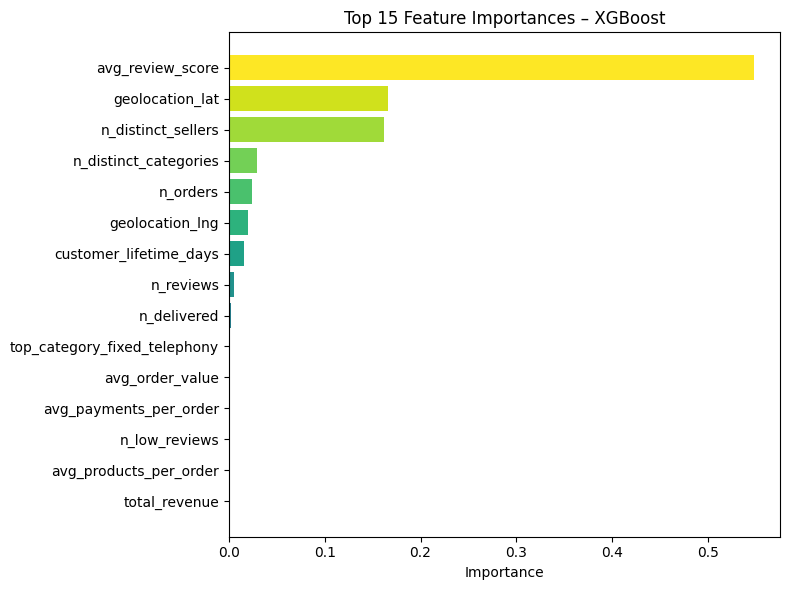

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dict from models_specs for easy access
model_dict = {name: model for (name, model, X_variant) in models_specs}

rf_model  = model_dict.get("Random Forest", None)
xgb_model = model_dict.get("XGBoost", None)

feature_names = X_train.columns.tolist()

def plot_feature_importance(model, model_name, feature_names, top_n=15):
    if model is None or not hasattr(model, "feature_importances_"):
        print(f"{model_name}: no feature_importances_ attribute.")
        return

    importances = model.feature_importances_
    fi_df = pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    }).sort_values("importance", ascending=False)

    print(f"\nTop {top_n} features for {model_name}:")
    print(fi_df.head(top_n))

    top = fi_df.head(top_n).iloc[::-1]  # reverse for nicer barh

    plt.figure(figsize=(8, 6))
    cmap = plt.cm.get_cmap("viridis")
    colors = cmap(np.linspace(0, 1, len(top)))

    plt.barh(top["feature"], top["importance"], color=colors)
    plt.title(f"Top {top_n} Feature Importances – {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

# Random Forest
plot_feature_importance(rf_model, "Random Forest", feature_names, top_n=15)

# XGBoost
plot_feature_importance(xgb_model, "XGBoost", feature_names, top_n=15)



Top 15 consensus important features (RF + XGB avg):
                   feature  importance
17        avg_review_score    0.417345
0          geolocation_lat    0.173610
18           n_low_reviews    0.126498
21      n_distinct_sellers    0.094443
1          geolocation_lng    0.071492
19   n_distinct_categories    0.025328
2                 n_orders    0.017997
7   customer_lifetime_days    0.012221
9            total_freight    0.009314
16               n_reviews    0.009082
3              n_delivered    0.009070
6         is_impulse_ratio    0.004096
10         avg_order_value    0.002964
13     total_payment_value    0.002833
8            total_revenue    0.002666


/tmp/ipython-input-1689079447.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("plasma")


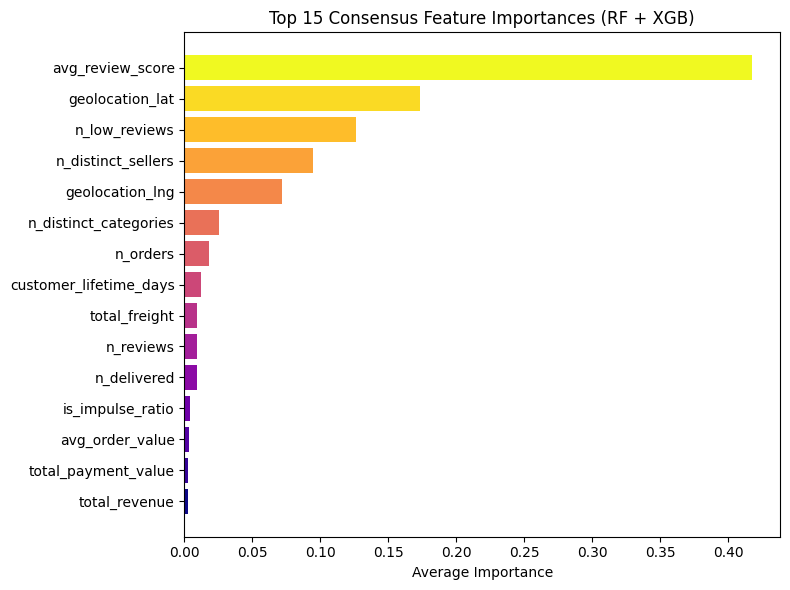

In [60]:
if (rf_model is not None and hasattr(rf_model, "feature_importances_") and
    xgb_model is not None and hasattr(xgb_model, "feature_importances_")):

    rf_imp  = rf_model.feature_importances_
    xgb_imp = xgb_model.feature_importances_

    avg_imp = (rf_imp + xgb_imp) / 2.0

    cons_df = pd.DataFrame({
        "feature": feature_names,
        "importance": avg_imp
    }).sort_values("importance", ascending=False)

    print("\nTop 15 consensus important features (RF + XGB avg):")
    print(cons_df.head(15))

    top_c = cons_df.head(15).iloc[::-1]

    plt.figure(figsize=(8, 6))
    cmap = plt.cm.get_cmap("plasma")
    colors = cmap(np.linspace(0, 1, len(top_c)))

    plt.barh(top_c["feature"], top_c["importance"], color=colors)
    plt.title("Top 15 Consensus Feature Importances (RF + XGB)")
    plt.xlabel("Average Importance")
    plt.tight_layout()
    plt.show()


X_all shape: (96096, 93)
y_all cluster distribution:
cluster
0    0.666365
1    0.198166
3    0.106154
2    0.029314
Name: proportion, dtype: float64
X_2d shape: (96096, 2)


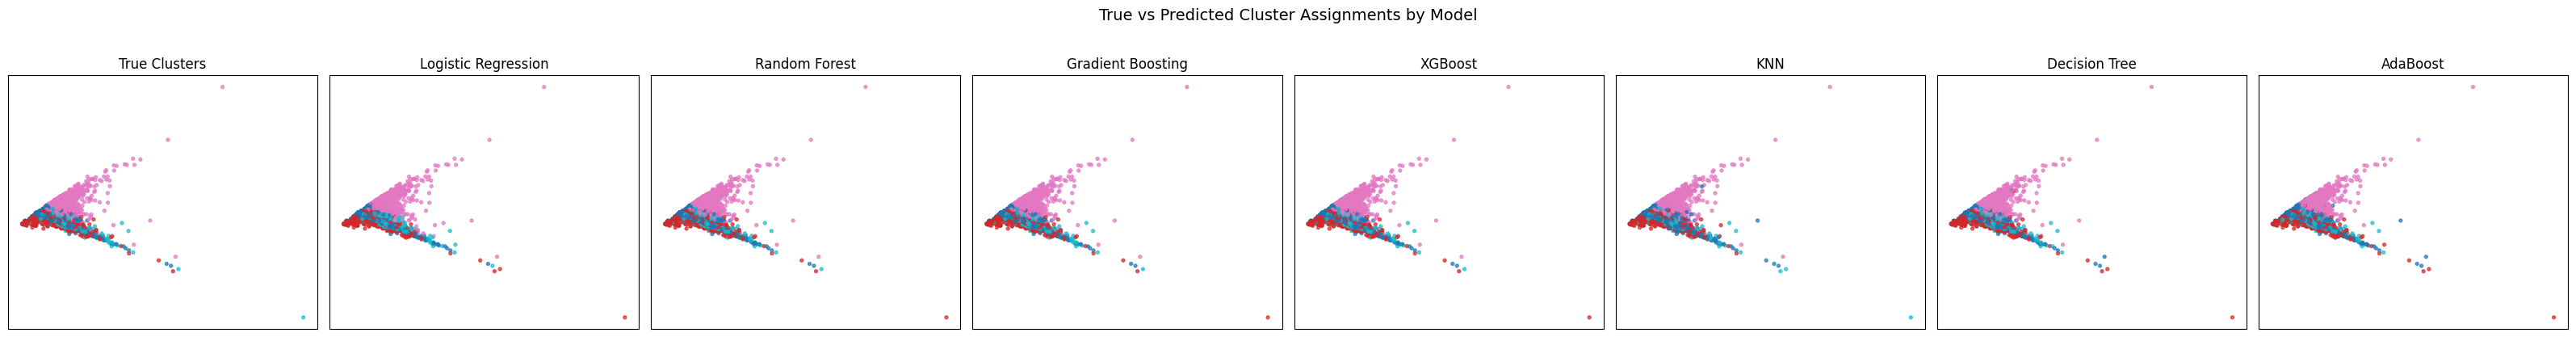

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Rebuild full data (X_all, y_all)
X_all = pd.concat([X_train, X_test], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)

print("X_all shape:", X_all.shape)
print("y_all cluster distribution:")
print(y_all.value_counts(normalize=True))

# 2) For visualization only: scale + PCA to 2D
scaler_vis = StandardScaler()
X_all_scaled = scaler_vis.fit_transform(X_all)

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_all_scaled)
print("X_2d shape:", X_2d.shape)

# 3) Prepare model dict from models_specs: name -> (model, X_variant)
model_dict = {name: (model, X_variant) for (name, model, X_variant) in models_specs}

# 4) Choose which models to visualize (keep it to 3–4 so the figure looks clean)
models_to_plot = [
    "Logistic Regression",
    "Random Forest",
    "Gradient Boosting",
    "XGBoost",
    "KNN",
    "Decision Tree",
    "AdaBoost"
]

# 5) Build X variants for all data (for models that need special scaling)
#    We already have svm_scaler and knn_scaler from before.
X_all_svm = None
try:
    X_all_svm = svm_scaler.transform(X_all)
except Exception as e:
    print("Could not build X_all_svm (will skip SVMs if any):", e)

X_all_knn = None
try:
    X_all_knn = knn_scaler.transform(X_all)
except Exception as e:
    print("Could not build X_all_knn (will skip KNN if needed):", e)

# 6) Create subplots: 1 for "True", rest for each model
n_models = len(models_to_plot)
n_cols = n_models + 1  # 1 extra for ground truth

fig, axes = plt.subplots(1, n_cols, figsize=(4 * n_cols, 4), sharex=True, sharey=True)

# --- First: true clusters ---
ax0 = axes[0]
scatter0 = ax0.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=y_all,
    cmap="tab10",
    s=8,
    alpha=0.7
)
ax0.set_title("True Clusters")
ax0.set_xticks([])
ax0.set_yticks([])

# --- Then: predicted clusters for each model ---
for idx, model_name in enumerate(models_to_plot, start=1):
    if model_name not in model_dict:
        axes[idx].set_title(f"{model_name}\n(not loaded)")
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])
        continue

    model, X_variant = model_dict[model_name]

    # Choose correct X for this model
    if X_variant == "X":
        X_use = X_all
    elif X_variant == "X_svm":
        if X_all_svm is None:
            axes[idx].set_title(f"{model_name}\n(no X_all_svm)")
            axes[idx].set_xticks([])
            axes[idx].set_yticks([])
            continue
        X_use = X_all_svm
    elif X_variant == "X_knn":
        if X_all_knn is None:
            axes[idx].set_title(f"{model_name}\n(no X_all_knn)")
            axes[idx].set_xticks([])
            axes[idx].set_yticks([])
            continue
        X_use = X_all_knn
    else:
        axes[idx].set_title(f"{model_name}\n(unknown X_variant)")
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])
        continue

    # Predict on all customers
    y_pred_all = model.predict(X_use)

    axes[idx].scatter(
        X_2d[:, 0],
        X_2d[:, 1],
        c=y_pred_all,
        cmap="tab10",
        s=8,
        alpha=0.7
    )
    axes[idx].set_title(model_name)
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

plt.suptitle("True vs Predicted Cluster Assignments by Model", y=1.03, fontsize=14)
plt.tight_layout()
plt.show()


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# 1) Define which features are "behavioral"
behavioral_feats = [
    "is_impulse_ratio",
    "n_is_impulse",
    "avg_review_score",
    "n_low_reviews",
    "n_reviews",
]

# 2) Full feature set
X_train_full = X_train.copy()
X_test_full  = X_test.copy()

# 3) Reduced feature set: drop behavioral features
drop_cols = [c for c in behavioral_feats if c in X_train_full.columns]
print("Dropping behavioral features:", drop_cols)

X_train_red = X_train_full.drop(columns=drop_cols)
X_test_red  = X_test_full.drop(columns=drop_cols)

print("Full X_train shape:", X_train_full.shape)
print("Reduced X_train shape:", X_train_red.shape)

# 4) Define models for ablation study
def make_models():
    return {
        "Logistic Regression": LogisticRegression(
            max_iter=1000,
            multi_class="multinomial",
            n_jobs=-1
        ),
        "Random Forest": RandomForestClassifier(
            n_estimators=200,
            max_depth=None,
            random_state=42,
            n_jobs=-1
        ),
        "Gradient Boosting": GradientBoostingClassifier(
            random_state=42
        ),
    }

results = []

# 5) Train & evaluate on FULL features
models_full = make_models()
for name, clf in models_full.items():
    clf.fit(X_train_full, y_train)
    y_pred = clf.predict(X_test_full)
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="macro")
    results.append({
        "Model": name,
        "Setting": "Full features",
        "Accuracy": acc,
        "Macro_F1": f1,
    })
    print(f"[Full] {name}: acc={acc:.4f}, macro F1={f1:.4f}")

# 6) Train & evaluate on REDUCED (no behavioral) features
models_red = make_models()
for name, clf in models_red.items():
    clf.fit(X_train_red, y_train)
    y_pred = clf.predict(X_test_red)
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="macro")
    results.append({
        "Model": name,
        "Setting": "No behavioral",
        "Accuracy": acc,
        "Macro_F1": f1,
    })
    print(f"[No behavioral] {name}: acc={acc:.4f}, macro F1={f1:.4f}")

ablation_df = pd.DataFrame(results)
ablation_df = ablation_df.sort_values(["Model", "Setting"])
ablation_df


Dropping behavioral features: ['is_impulse_ratio', 'n_is_impulse', 'avg_review_score', 'n_low_reviews', 'n_reviews']
Full X_train shape: (76876, 93)
Reduced X_train shape: (76876, 88)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[Full] Logistic Regression: acc=0.9706, macro F1=0.9237
[Full] Random Forest: acc=0.9968, macro F1=0.9933
[Full] Gradient Boosting: acc=0.9986, macro F1=0.9973


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[No behavioral] Logistic Regression: acc=0.7952, macro F1=0.7214
[No behavioral] Random Forest: acc=0.8187, macro F1=0.7834
[No behavioral] Gradient Boosting: acc=0.8227, macro F1=0.7782


,Model,Setting,Accuracy,Macro_F1
2,Gradient Boosting,Full features,0.998647,0.997265
5,Gradient Boosting,No behavioral,0.822737,0.778247
0,Logistic Regression,Full features,0.970552,0.923709
3,Logistic Regression,No behavioral,0.795213,0.721434
1,Random Forest,Full features,0.996774,0.993261
4,Random Forest,No behavioral,0.818678,0.783373


Setting              Full features  No behavioral
Model                                            
Gradient Boosting         0.998647       0.822737
Logistic Regression       0.970552       0.795213
Random Forest             0.996774       0.818678


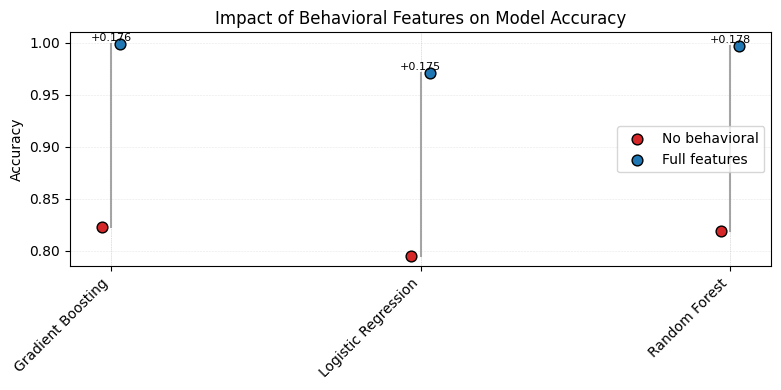

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Pivot to get columns: Full features, No behavioral
acc_pivot = ablation_df.pivot(index="Model", columns="Setting", values="Accuracy")
acc_pivot = acc_pivot[["Full features", "No behavioral"]]  # ensure order

print(acc_pivot)

models = acc_pivot.index.tolist()
full_acc = acc_pivot["Full features"].values
red_acc  = acc_pivot["No behavioral"].values

x = np.arange(len(models))

plt.figure(figsize=(8, 4))

# draw faint vertical guides for each model
for xi in x:
    plt.axvline(x=xi, color="lightgrey", linestyle=":", linewidth=0.5, zorder=0)

# line segments from "no behavioral" to "full"
for xi, a_red, a_full in zip(x, red_acc, full_acc):
    plt.plot([xi, xi], [a_red, a_full], color="grey", linewidth=1.5, alpha=0.7, zorder=1)

# scatter points
plt.scatter(x - 0.03, red_acc, color="tab:red",   s=60, label="No behavioral", edgecolor="black", zorder=2)
plt.scatter(x + 0.03, full_acc, color="tab:blue", s=60, label="Full features", edgecolor="black", zorder=2)

# annotate differences
for xi, a_red, a_full in zip(x, red_acc, full_acc):
    diff = a_full - a_red
    plt.text(xi, max(a_red, a_full) + 0.001,
             f"+{diff:.3f}",
             ha="center", va="bottom", fontsize=8)

plt.xticks(x, models, rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Impact of Behavioral Features on Model Accuracy")
plt.ylim(min(min(full_acc), min(red_acc)) - 0.01, 1.01)
plt.legend()
plt.grid(alpha=0.3, linestyle="--", linewidth=0.4)
plt.tight_layout()
plt.show()
